In [1]:
"""
REDES NEURONALES PROFUNDAS DESDE CERO
=====================================

Objetivos:
- Expandir implementaci√≥n de redes neuronales a arquitecturas flexibles
- Crear sistema modular con clases para cada componente
- Implementar funciones de activaci√≥n avanzadas (ReLU)
- Usar m√©todos de inicializaci√≥n avanzados (Xavier, He)
- Implementar optimizadores adaptativos (AdaGrad)
- Construir redes de cualquier profundidad y configuraci√≥n

Sprint: Deep Learning Architecture Design
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("="*80)
print("REDES NEURONALES PROFUNDAS DESDE CERO")
print("Arquitectura Modular y Componentes Avanzados")
print("="*80)


REDES NEURONALES PROFUNDAS DESDE CERO
Arquitectura Modular y Componentes Avanzados


In [2]:
# ============================================================================
# 1. FUNDAMENTOS DE DEEP LEARNING MODULAR
# ============================================================================

print("üìö 1. FUNDAMENTOS DE DEEP LEARNING MODULAR")
print("="*45)

print("""
üèóÔ∏è ARQUITECTURA MODULAR:
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

üìä CONCEPTO CENTRAL:
   ‚Ä¢ Cada componente como clase independiente
   ‚Ä¢ F√°cil intercambiabilidad de elementos
   ‚Ä¢ Escalabilidad a redes de cualquier profundidad
   ‚Ä¢ Mantenibilidad y extensibilidad mejoradas

üß± COMPONENTES MODULARES:
   
   üî∏ CAPAS (Layers):
      ‚Ä¢ FC (Fully Connected) - Capa densa
      ‚Ä¢ Convolutional (futuro) - Para CNNs
      ‚Ä¢ Recurrent (futuro) - Para RNNs
   
   üî∏ FUNCIONES DE ACTIVACI√ìN:
      ‚Ä¢ Sigmoid: œÉ(x) = 1/(1 + e^(-x))
      ‚Ä¢ Tanh: tanh(x) = (e^x - e^(-x))/(e^x + e^(-x))
      ‚Ä¢ ReLU: f(x) = max(0, x) ‚Üê ¬°Nuevo!
      ‚Ä¢ Softmax: Para clasificaci√≥n multiclase
   
   üî∏ INICIALIZADORES:
      ‚Ä¢ Simple: Distribuci√≥n gaussiana œÉ = 0.01
      ‚Ä¢ Xavier: œÉ = ‚àö(1/n) ‚Üê Para sigmoid/tanh
      ‚Ä¢ He: œÉ = ‚àö(2/n) ‚Üê Para ReLU
   
   üî∏ OPTIMIZADORES:
      ‚Ä¢ SGD: Gradient Descent cl√°sico
      ‚Ä¢ AdaGrad: Adaptativo con historial ‚Üê ¬°Nuevo!
      ‚Ä¢ Adam (futuro): Estado del arte
      ‚Ä¢ RMSprop (futuro): Alternativa popular

üéØ VENTAJAS DEL DISE√ëO MODULAR:
   ‚Ä¢ Experimentaci√≥n r√°pida con configuraciones
   ‚Ä¢ Debugging m√°s f√°cil por componente
   ‚Ä¢ Reutilizaci√≥n de c√≥digo
   ‚Ä¢ Extensibilidad sin refactoring completo
   ‚Ä¢ Separation of concerns

üî¨ FORWARD PROPAGATION MODULAR:
   A‚ÇÅ = FC‚ÇÅ.forward(X)
   Z‚ÇÅ = Activation‚ÇÅ.forward(A‚ÇÅ)
   A‚ÇÇ = FC‚ÇÇ.forward(Z‚ÇÅ)
   Z‚ÇÇ = Activation‚ÇÇ.forward(A‚ÇÇ)
   ...

üîÑ BACKWARD PROPAGATION MODULAR:
   dA‚ÇÉ = Activation‚ÇÉ.backward(Z‚ÇÉ, Y)
   dZ‚ÇÇ = FC‚ÇÉ.backward(dA‚ÇÉ)
   dA‚ÇÇ = Activation‚ÇÇ.backward(dZ‚ÇÇ)
   dZ‚ÇÅ = FC‚ÇÇ.backward(dA‚ÇÇ)
   ...

‚ö° OPTIMIZACI√ìN ADAPTATIVA:
   ‚Ä¢ Cada par√°metro tiene learning rate individual
   ‚Ä¢ Se adapta basado en historial de gradientes
   ‚Ä¢ Convergencia m√°s r√°pida y estable
   ‚Ä¢ Menor sensibilidad a hiperpar√°metros
""")

print("‚úÖ Fundamentos de arquitectura modular establecidos")


üìö 1. FUNDAMENTOS DE DEEP LEARNING MODULAR

üèóÔ∏è ARQUITECTURA MODULAR:
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

üìä CONCEPTO CENTRAL:
   ‚Ä¢ Cada componente como clase independiente
   ‚Ä¢ F√°cil intercambiabilidad de elementos
   ‚Ä¢ Escalabilidad a redes de cualquier profundidad
   ‚Ä¢ Mantenibilidad y extensibilidad mejoradas

üß± COMPONENTES MODULARES:
   
   üî∏ CAPAS (Layers):
      ‚Ä¢ FC (Fully Connected) - Capa densa
      ‚Ä¢ Convolutional (futuro) - Para CNNs
      ‚Ä¢ Recurrent (futuro) - Para RNNs
   
   üî∏ FUNCIONES DE ACTIVACI√ìN:
      ‚Ä¢ Sigmoid: œÉ(x) = 1/(1 + e^(-x))
      ‚Ä¢ Tanh: tanh(x) = (e^x - e^(-x))/(e^x + e^(-x))
      ‚Ä¢ ReLU: f(x) = max(0, x) ‚Üê ¬°Nuevo!
      ‚Ä¢ Softmax: Para clasificaci√≥n multiclase
   
   üî∏ INICIALIZADORES:
      ‚Ä¢ Simple: Distribuci√≥n gaussiana œÉ = 0.01
      ‚Ä¢ Xavier: œÉ = ‚àö(1/n) ‚Üê Para sigmoid/tanh
      ‚Ä¢ He: œÉ = ‚àö(2/n) ‚Üê Para ReLU
   
   üî∏ OPTIMIZADORES:
      ‚

In [3]:
# ============================================================================
# 2. DATASET MNIST PREPARATION
# ============================================================================

print("\nüìä 2. PREPARACI√ìN DEL DATASET MNIST")
print("="*40)

# Cargar MNIST
print("üîΩ CARGANDO DATASET MNIST:")
try:
    from tensorflow.keras.datasets import mnist
    (X_train_original, y_train_original), (X_test_original, y_test_original) = mnist.load_data()
    print("   ‚úÖ MNIST cargado desde Keras/TensorFlow")
except ImportError:
    print("   ‚ö†Ô∏è Generando datos sint√©ticos...")
    np.random.seed(42)
    X_train_original = np.random.randint(0, 256, (60000, 28, 28), dtype=np.uint8)
    y_train_original = np.random.randint(0, 10, 60000)
    X_test_original = np.random.randint(0, 256, (10000, 28, 28), dtype=np.uint8)
    y_test_original = np.random.randint(0, 10, 10000)
    print("   ‚úÖ Datos sint√©ticos generados")

# Preprocesamiento
print(f"\nüîß PREPROCESAMIENTO:")

# Flatten y normalizaci√≥n
X_train_flat = X_train_original.reshape(-1, 784).astype(np.float32) / 255.0
X_test_flat = X_test_original.reshape(-1, 784).astype(np.float32) / 255.0

# One-hot encoding
enc = OneHotEncoder(sparse=False)
y_train_one_hot = enc.fit_transform(y_train_original.reshape(-1, 1))
y_test_one_hot = enc.transform(y_test_original.reshape(-1, 1))

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_flat, y_train_one_hot, test_size=0.2, random_state=42, 
    stratify=y_train_original
)

y_train_labels, y_val_labels = train_test_split(
    y_train_original, test_size=0.2, random_state=42, stratify=y_train_original
)

print(f"   ‚Ä¢ Entrenamiento: {X_train.shape}")
print(f"   ‚Ä¢ Validaci√≥n: {X_val.shape}")
print(f"   ‚Ä¢ Prueba: {X_test_flat.shape}")
print(f"   ‚Ä¢ Caracter√≠sticas: {X_train.shape[1]}")
print(f"   ‚Ä¢ Clases: {y_train.shape[1]}")

# Mini-batch iterator (reutilizando implementaci√≥n anterior)
class GetMiniBatch:
    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(int)
        self._counter = 0
    
    def __len__(self):
        return self._stop
    
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = min(self._counter * self.batch_size + self.batch_size, len(self._X))
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

print("‚úÖ Dataset MNIST preparado")



üìä 2. PREPARACI√ìN DEL DATASET MNIST
üîΩ CARGANDO DATASET MNIST:
   ‚úÖ MNIST cargado desde Keras/TensorFlow

üîß PREPROCESAMIENTO:
   ‚Ä¢ Entrenamiento: (48000, 784)
   ‚Ä¢ Validaci√≥n: (12000, 784)
   ‚Ä¢ Prueba: (10000, 784)
   ‚Ä¢ Caracter√≠sticas: 784
   ‚Ä¢ Clases: 10
‚úÖ Dataset MNIST preparado



üé≤ 3. M√âTODOS DE INICIALIZACI√ìN
[Problema 2] Clasificaci√≥n del m√©todo de inicializaci√≥n
üß™ COMPARANDO M√âTODOS DE INICIALIZACI√ìN:
   ‚Ä¢ Simple (œÉ=0.01): mean=0.000000, std=0.009995
   ‚Ä¢ Xavier: mean=-0.000026, std=0.035714
   ‚Ä¢ He: mean=-0.000031, std=0.050509


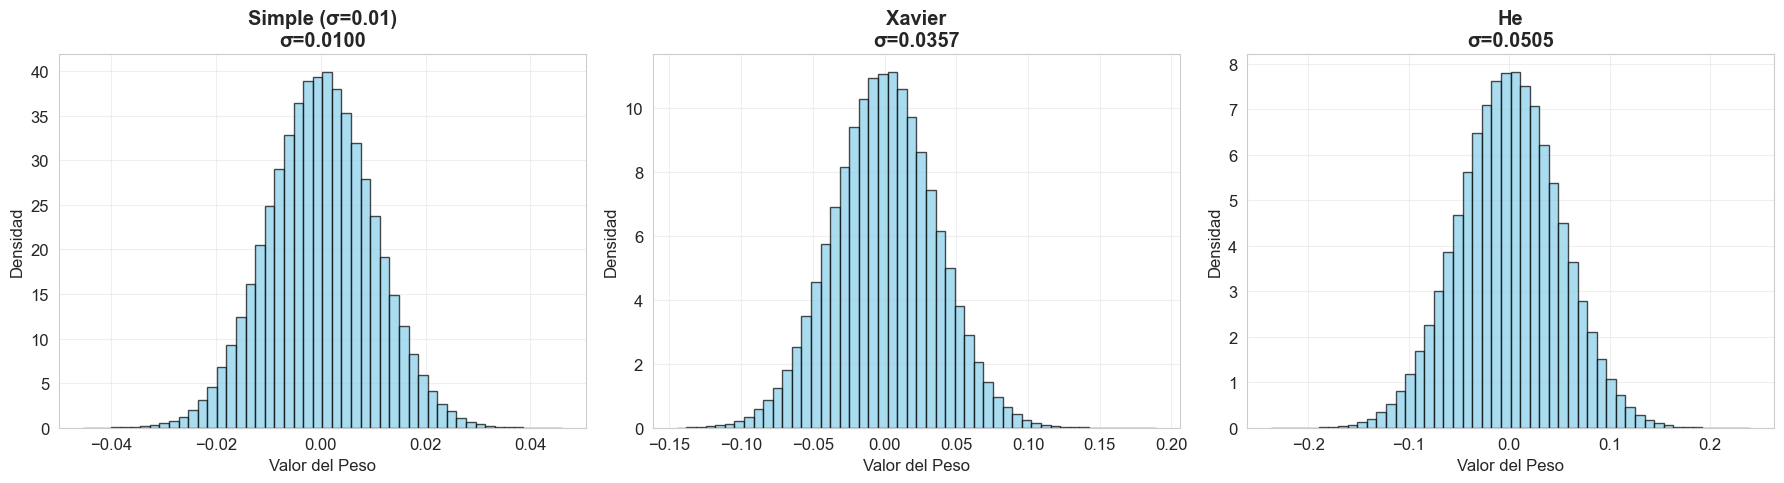

‚úÖ M√©todos de inicializaci√≥n implementados


In [4]:
# ============================================================================
# 3. M√âTODOS DE INICIALIZACI√ìN
# ============================================================================

print("\nüé≤ 3. M√âTODOS DE INICIALIZACI√ìN")
print("="*35)

print("[Problema 2] Clasificaci√≥n del m√©todo de inicializaci√≥n")

class SimpleInitializer:
    """
    Inicializaci√≥n simple con distribuci√≥n gaussiana
    
    Parameters
    ----------
    sigma : float
        Desviaci√≥n est√°ndar de la distribuci√≥n gaussiana
    """
    
    def __init__(self, sigma=0.01):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        Inicializar pesos
        
        Returns
        -------
        W : ndarray, shape (n_nodes1, n_nodes2)
            Matriz de pesos inicializados
        """
        return self.sigma * np.random.randn(n_nodes1, n_nodes2)
    
    def B(self, n_nodes2):
        """
        Inicializar sesgos
        
        Returns
        -------
        B : ndarray, shape (n_nodes2,)
            Vector de sesgos inicializados
        """
        return np.zeros(n_nodes2)

class XavierInitializer:
    """
    [Problema 6] Inicializaci√≥n Xavier (Glorot)
    √ìptima para funciones sigmoid y tanh
    
    œÉ = ‚àö(1/n) donde n es el n√∫mero de nodos en la capa anterior
    """
    
    def W(self, n_nodes1, n_nodes2):
        """
        Inicializar pesos con m√©todo Xavier
        """
        sigma = np.sqrt(1.0 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)
    
    def B(self, n_nodes2):
        """
        Inicializar sesgos en cero
        """
        return np.zeros(n_nodes2)

class HeInitializer:
    """
    [Problema 6] Inicializaci√≥n He
    √ìptima para funci√≥n ReLU
    
    œÉ = ‚àö(2/n) donde n es el n√∫mero de nodos en la capa anterior
    """
    
    def W(self, n_nodes1, n_nodes2):
        """
        Inicializar pesos con m√©todo He
        """
        sigma = np.sqrt(2.0 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)
    
    def B(self, n_nodes2):
        """
        Inicializar sesgos en cero
        """
        return np.zeros(n_nodes2)

# Demostraci√≥n de diferentes inicializadores
print("üß™ COMPARANDO M√âTODOS DE INICIALIZACI√ìN:")

n_nodes1, n_nodes2 = 784, 400
methods = [
    ("Simple (œÉ=0.01)", SimpleInitializer(0.01)),
    ("Xavier", XavierInitializer()),
    ("He", HeInitializer())
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, initializer) in enumerate(methods):
    # Generar pesos
    W = initializer.W(n_nodes1, n_nodes2)
    
    # Plotear histograma
    axes[idx].hist(W.flatten(), bins=50, alpha=0.7, density=True, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'{name}\nœÉ={np.std(W):.4f}', fontweight='bold')
    axes[idx].set_xlabel('Valor del Peso')
    axes[idx].set_ylabel('Densidad')
    axes[idx].grid(True, alpha=0.3)
    
    # Estad√≠sticas
    print(f"   ‚Ä¢ {name}: mean={np.mean(W):.6f}, std={np.std(W):.6f}")

plt.tight_layout()
plt.show()

print("‚úÖ M√©todos de inicializaci√≥n implementados")



‚ö° 4. M√âTODOS DE OPTIMIZACI√ìN
[Problema 3] Clasificaci√≥n de m√©todos de optimizaci√≥n
üß™ SIMULANDO COMPORTAMIENTO DE OPTIMIZADORES:


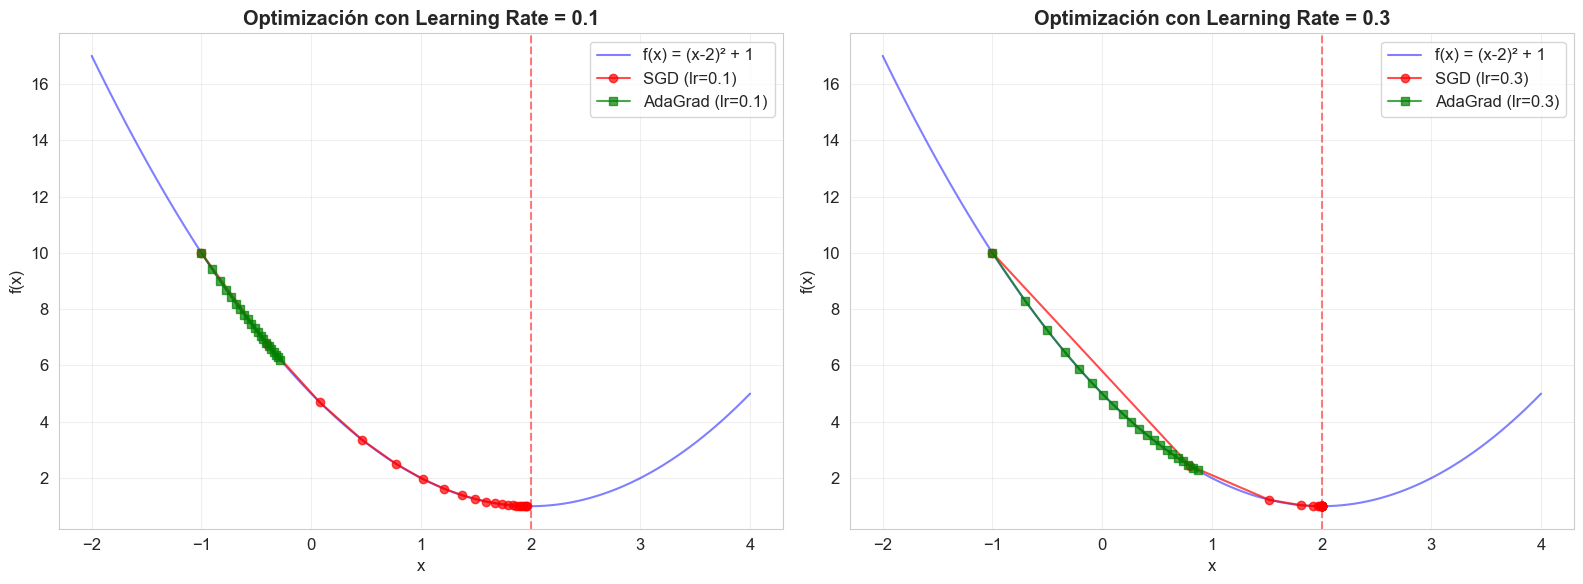

üìä AN√ÅLISIS:
   ‚Ä¢ SGD: Velocidad constante, puede ser lento o inestable
   ‚Ä¢ AdaGrad: Se adapta, inicialmente r√°pido luego m√°s lento
   ‚Ä¢ AdaGrad √∫til para gradientes esparsos o irregulares
‚úÖ M√©todos de optimizaci√≥n implementados


In [5]:
# ============================================================================
# 4. M√âTODOS DE OPTIMIZACI√ìN
# ============================================================================

print("\n‚ö° 4. M√âTODOS DE OPTIMIZACI√ìN")
print("="*35)

print("[Problema 3] Clasificaci√≥n de m√©todos de optimizaci√≥n")

class SGD:
    """
    Stochastic Gradient Descent (Descenso de Gradiente Estoc√°stico)
    
    Parameters
    ----------
    lr : float
        Learning rate (tasa de aprendizaje)
    """
    
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, layer):
        """
        Actualizar pesos y sesgos de una capa
        
        Parameters
        ----------
        layer : FC
            Instancia de capa completamente conectada
            
        Returns
        -------
        layer : FC
            Capa con par√°metros actualizados
        """
        # SGD cl√°sico: Œ∏ = Œ∏ - Œ±‚àáŒ∏
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return layer

class AdaGrad:
    """
    [Problema 7] Adaptive Gradient Algorithm
    Ajusta learning rate individualmente para cada par√°metro
    
    F√≥rmula:
    H = H + ‚àáŒ∏ ‚äô ‚àáŒ∏ (suma acumulada de gradientes al cuadrado)
    Œ∏ = Œ∏ - Œ± * (1/‚àö(H + Œµ)) ‚äô ‚àáŒ∏
    
    Parameters
    ----------
    lr : float
        Learning rate inicial
    eps : float
        Peque√±o valor para evitar divisi√≥n por cero
    """
    
    def __init__(self, lr=0.01, eps=1e-8):
        self.lr = lr
        self.eps = eps
        # Historial de gradientes se inicializa en primer uso
    
    def update(self, layer):
        """
        Actualizar usando AdaGrad
        """
        # Inicializar historial de gradientes si es primera vez
        if not hasattr(layer, 'H_W'):
            layer.H_W = np.zeros_like(layer.W)
            layer.H_B = np.zeros_like(layer.B)
        
        # Acumular gradientes al cuadrado
        layer.H_W += layer.dW ** 2
        layer.H_B += layer.dB ** 2
        
        # Actualizar con learning rate adaptativo
        layer.W -= self.lr * layer.dW / (np.sqrt(layer.H_W) + self.eps)
        layer.B -= self.lr * layer.dB / (np.sqrt(layer.H_B) + self.eps)
        
        return layer

# Demostraci√≥n de comportamiento de optimizadores
print("üß™ SIMULANDO COMPORTAMIENTO DE OPTIMIZADORES:")

# Funci√≥n cuadr√°tica simple: f(x) = (x-2)¬≤ + 1
def quadratic_function(x):
    return (x - 2)**2 + 1

def quadratic_gradient(x):
    return 2 * (x - 2)

# Simulaci√≥n de optimizaci√≥n
x_start = -1.0
learning_rates = [0.1, 0.3]
max_iterations = 20

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for lr_idx, lr in enumerate(learning_rates):
    ax = axes[lr_idx]
    
    # Plot funci√≥n
    x_range = np.linspace(-2, 4, 100)
    y_range = [quadratic_function(x) for x in x_range]
    ax.plot(x_range, y_range, 'b-', alpha=0.5, label='f(x) = (x-2)¬≤ + 1')
    
    # SGD
    x_sgd = x_start
    history_sgd = [x_sgd]
    
    for _ in range(max_iterations):
        grad = quadratic_gradient(x_sgd)
        x_sgd = x_sgd - lr * grad
        history_sgd.append(x_sgd)
    
    y_sgd = [quadratic_function(x) for x in history_sgd]
    ax.plot(history_sgd, y_sgd, 'ro-', alpha=0.7, label=f'SGD (lr={lr})')
    
    # AdaGrad simulation
    x_ada = x_start
    h_ada = 0  # Historial de gradientes
    eps = 1e-8
    history_ada = [x_ada]
    
    for _ in range(max_iterations):
        grad = quadratic_gradient(x_ada)
        h_ada += grad ** 2
        x_ada = x_ada - lr * grad / (np.sqrt(h_ada) + eps)
        history_ada.append(x_ada)
    
    y_ada = [quadratic_function(x) for x in history_ada]
    ax.plot(history_ada, y_ada, 'gs-', alpha=0.7, label=f'AdaGrad (lr={lr})')
    
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(f'Optimizaci√≥n con Learning Rate = {lr}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axvline(x=2, color='red', linestyle='--', alpha=0.5, label='√ìptimo (x=2)')

plt.tight_layout()
plt.show()

print(f"üìä AN√ÅLISIS:")
print(f"   ‚Ä¢ SGD: Velocidad constante, puede ser lento o inestable")
print(f"   ‚Ä¢ AdaGrad: Se adapta, inicialmente r√°pido luego m√°s lento")
print(f"   ‚Ä¢ AdaGrad √∫til para gradientes esparsos o irregulares")

print("‚úÖ M√©todos de optimizaci√≥n implementados")



üî• 5. FUNCIONES DE ACTIVACI√ìN COMPLETAS
[Problema 4] Clasificaci√≥n de funciones de activaci√≥n
üìä VISUALIZACI√ìN COMPLETA DE FUNCIONES DE ACTIVACI√ìN:


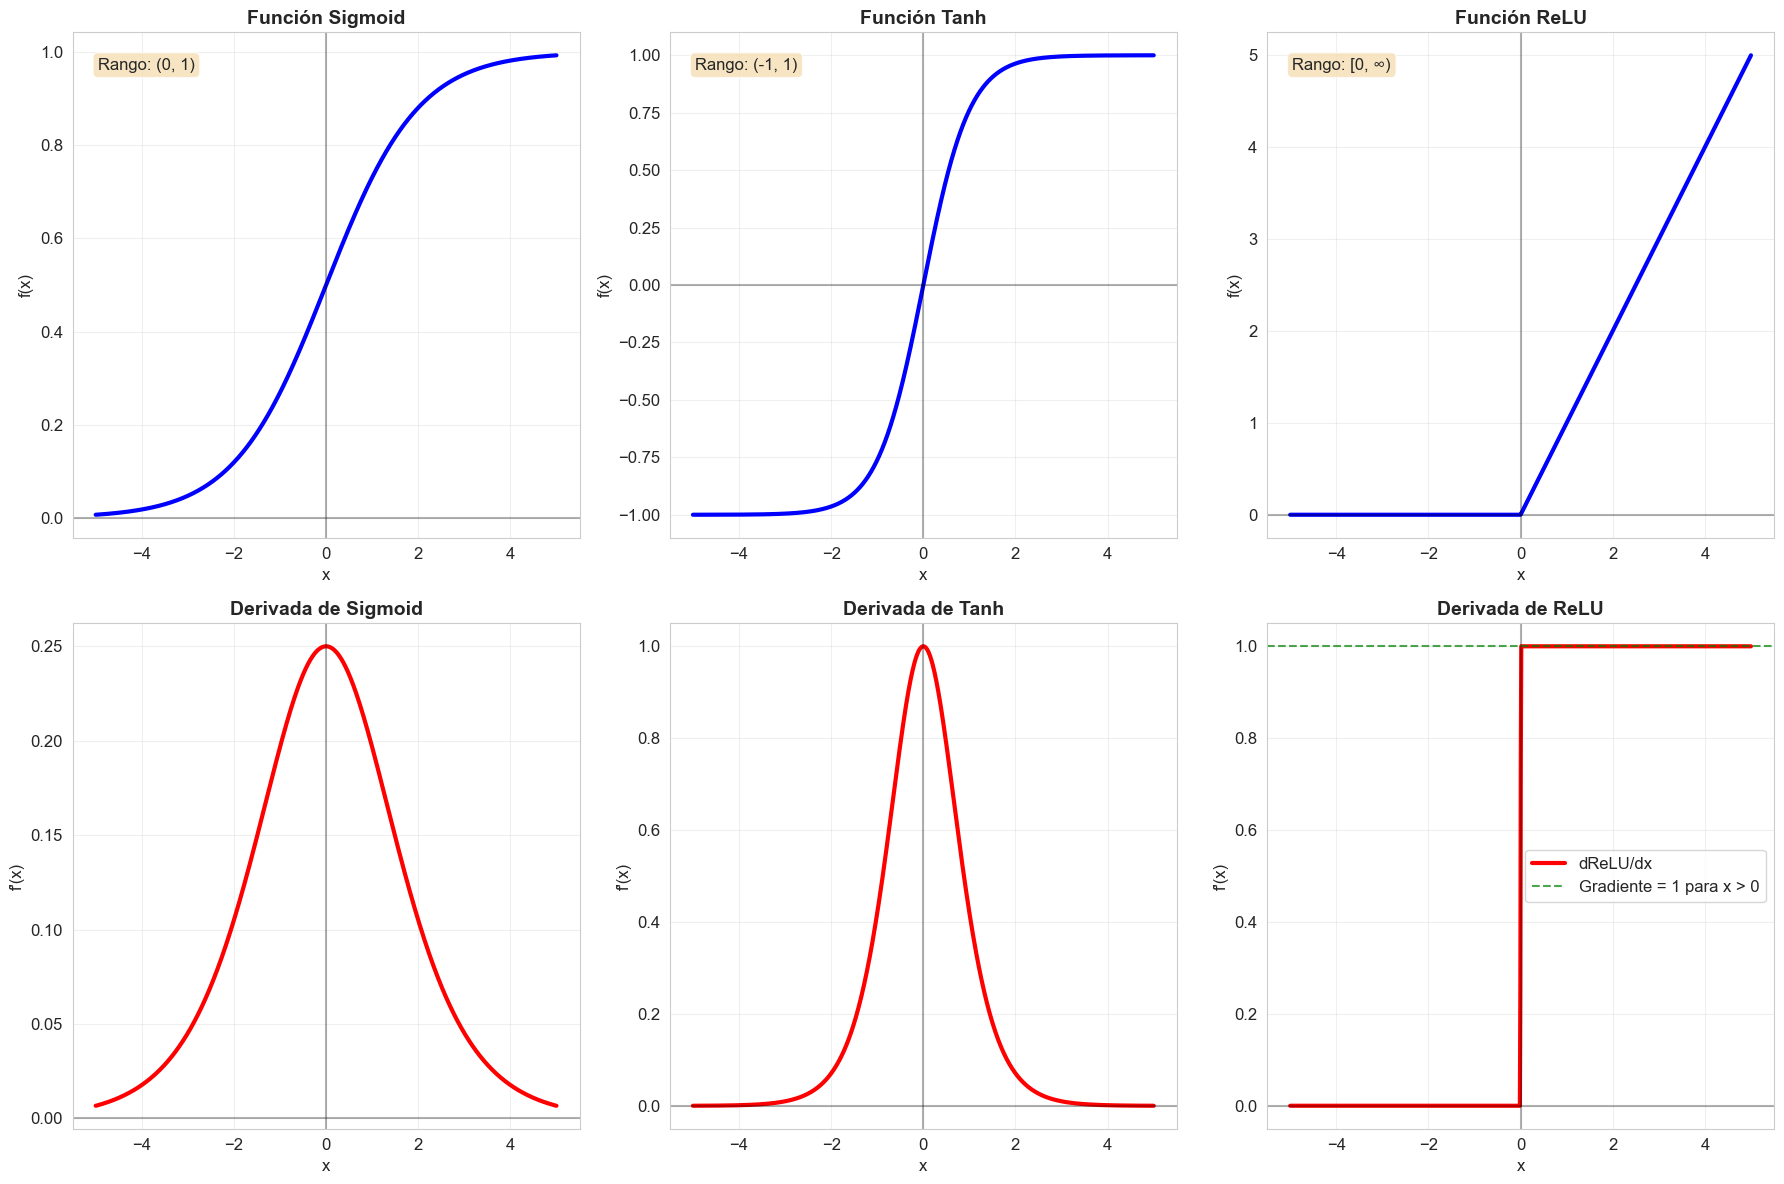


üîç AN√ÅLISIS DETALLADO DE PROPIEDADES:

   üìà SIGMOID:
      ‚Ä¢ Rango: (0, 1)
      ‚Ä¢ Ventajas: Salida interpretable como probabilidad
      ‚Ä¢ Desventajas: Vanishing gradient, no centrada en 0
      ‚Ä¢ Uso t√≠pico: Capa de salida para clasificaci√≥n binaria
      ‚Ä¢ Derivada m√°xima: 0.25 (en x=0)

   üìà TANH:
      ‚Ä¢ Rango: (-1, 1)
      ‚Ä¢ Ventajas: Centrada en 0, mejor que sigmoid para capas ocultas
      ‚Ä¢ Desventajas: A√∫n sufre vanishing gradient
      ‚Ä¢ Uso t√≠pico: Capas ocultas en redes no muy profundas
      ‚Ä¢ Derivada m√°xima: 1.0 (en x=0)

   üìà ReLU (¬°M√ÅS IMPORTANTE!):
      ‚Ä¢ Rango: [0, ‚àû)
      ‚Ä¢ Ventajas: No vanishing gradient para x>0, r√°pida computaci√≥n
      ‚Ä¢ Desventajas: Dying ReLU (neuronas 'muertas' para x‚â§0)
      ‚Ä¢ Uso t√≠pico: Est√°ndar en deep learning moderno
      ‚Ä¢ Derivada: 1 para x>0, 0 para x‚â§0

‚ö†Ô∏è DEMOSTRACI√ìN DEL VANISHING GRADIENT:
   ‚Ä¢ Sigmoid: Despu√©s de 5 capas: 0.000727, despu√©s de 10 capas: 0

In [6]:
# ============================================================================
# 5. FUNCIONES DE ACTIVACI√ìN COMPLETAS
# ============================================================================

print("\nüî• 5. FUNCIONES DE ACTIVACI√ìN COMPLETAS")
print("="*40)

print("[Problema 4] Clasificaci√≥n de funciones de activaci√≥n")

class Sigmoid:
    """
    Funci√≥n Sigmoid: œÉ(x) = 1/(1 + e^(-x))
    Rango: (0, 1)
    """
    
    def forward(self, X):
        """Forward pass"""
        self.X = X
        # Clip para estabilidad num√©rica
        X_clipped = np.clip(X, -500, 500)
        self.A = 1 / (1 + np.exp(-X_clipped))
        return self.A
    
    def backward(self, dA):
        """
        Backward pass
        Derivada: œÉ'(x) = œÉ(x)(1 - œÉ(x))
        """
        dX = dA * self.A * (1 - self.A)
        return dX

class Tanh:
    """
    Funci√≥n Tangente Hiperb√≥lica
    Rango: (-1, 1)
    """
    
    def forward(self, X):
        self.X = X
        self.A = np.tanh(X)
        return self.A
    
    def backward(self, dA):
        """
        Derivada: tanh'(x) = 1 - tanh¬≤(x)
        """
        dX = dA * (1 - self.A**2)
        return dX

class ReLU:
    """
    [Problema 5] Rectified Linear Unit: f(x) = max(0, x)
    
    La funci√≥n de activaci√≥n m√°s popular en deep learning moderno.
    
    Ventajas:
    - No sufre vanishing gradient para x > 0
    - Computacionalmente eficiente
    - Convergencia m√°s r√°pida
    
    Desventajas:
    - Dying ReLU problem (gradiente 0 para x ‚â§ 0)
    """
    
    def forward(self, X):
        """
        Forward pass: f(x) = max(0, x)
        Usando np.maximum para operaci√≥n vectorizada
        """
        self.X = X
        self.A = np.maximum(0, X)
        return self.A
    
    def backward(self, dA):
        """
        Backward pass
        Derivada: f'(x) = 1 si x > 0, 0 si x ‚â§ 0
        
        Para x = 0, matem√°ticamente no es diferenciable,
        pero por convenci√≥n usamos 0.
        """
        dX = dA * (self.X > 0).astype(np.float32)
        return dX

class Softmax:
    """
    Funci√≥n Softmax para clasificaci√≥n multiclase
    
    Convierte un vector de valores reales en una distribuci√≥n de probabilidad.
    La suma de todas las salidas es 1.
    
    F√≥rmula: œÉ(x_i) = e^(x_i) / Œ£_j e^(x_j)
    """
    
    def forward(self, X):
        """
        Forward pass con estabilidad num√©rica
        """
        self.X = X
        # Restar m√°ximo para estabilidad num√©rica (evita overflow)
        X_shifted = X - np.max(X, axis=1, keepdims=True)
        exp_X = np.exp(X_shifted)
        self.A = exp_X / np.sum(exp_X, axis=1, keepdims=True)
        return self.A
    
    def backward(self, dA, Y=None):
        """
        Backward pass
        
        Si Y se proporciona, asume que estamos calculando el gradiente
        combinado de softmax + cross-entropy loss, lo cual es m√°s estable.
        """
        if Y is not None:
            # Gradiente combinado softmax + cross-entropy
            batch_size = dA.shape[0] if hasattr(dA, 'shape') else len(dA)
            dX = (self.A - Y) / batch_size
        else:
            # Solo softmax (m√°s complejo)
            batch_size = dA.shape[0]
            dX = np.zeros_like(self.X)
            
            for i in range(batch_size):
                # Matriz Jacobiana para softmax
                a = self.A[i:i+1]  # (1, n_classes)
                jacobian = np.diagflat(a.flatten()) - np.dot(a.T, a)
                dX[i:i+1] = np.dot(dA[i:i+1], jacobian)
        
        return dX

# Visualizaci√≥n comprehensiva de funciones de activaci√≥n
print("üìä VISUALIZACI√ìN COMPLETA DE FUNCIONES DE ACTIVACI√ìN:")

# Crear datos de prueba
x = np.linspace(-5, 5, 1000)
x_matrix = x.reshape(-1, 1)

# Lista de activaciones para probar
activations = [
    ("Sigmoid", Sigmoid()),
    ("Tanh", Tanh()),
    ("ReLU", ReLU())
]

# Crear gr√°ficos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for idx, (name, activation) in enumerate(activations):
    # Forward pass
    y = activation.forward(x_matrix).flatten()
    
    # Gr√°fico de la funci√≥n
    axes[0, idx].plot(x, y, linewidth=3, color='blue', label=f'{name}')
    axes[0, idx].set_title(f'Funci√≥n {name}', fontweight='bold', fontsize=14)
    axes[0, idx].set_xlabel('x')
    axes[0, idx].set_ylabel('f(x)')
    axes[0, idx].grid(True, alpha=0.3)
    axes[0, idx].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[0, idx].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Agregar informaci√≥n del rango
    y_min, y_max = np.min(y), np.max(y)
    if name == 'Sigmoid':
        range_text = 'Rango: (0, 1)'
    elif name == 'Tanh':
        range_text = 'Rango: (-1, 1)'
    elif name == 'ReLU':
        range_text = 'Rango: [0, ‚àû)'
    
    axes[0, idx].text(0.05, 0.95, range_text, transform=axes[0, idx].transAxes,
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                     verticalalignment='top')
    
    # Derivada (aproximaci√≥n num√©rica para visualizaci√≥n)
    dx = x[1] - x[0]
    dy_numerical = np.gradient(y, dx)
    
    axes[1, idx].plot(x, dy_numerical, linewidth=3, color='red', label=f"d{name}/dx")
    axes[1, idx].set_title(f'Derivada de {name}', fontweight='bold', fontsize=14)
    axes[1, idx].set_xlabel('x')
    axes[1, idx].set_ylabel("f'(x)")
    axes[1, idx].grid(True, alpha=0.3)
    axes[1, idx].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, idx].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Resaltar caracter√≠sticas especiales de la derivada
    if name == 'ReLU':
        axes[1, idx].axhline(y=1, color='green', linestyle='--', alpha=0.7, 
                            label='Gradiente = 1 para x > 0')
        axes[1, idx].legend()

plt.tight_layout()
plt.show()

# An√°lisis detallado de propiedades
print(f"\nüîç AN√ÅLISIS DETALLADO DE PROPIEDADES:")

print(f"\n   üìà SIGMOID:")
print(f"      ‚Ä¢ Rango: (0, 1)")
print(f"      ‚Ä¢ Ventajas: Salida interpretable como probabilidad")
print(f"      ‚Ä¢ Desventajas: Vanishing gradient, no centrada en 0")
print(f"      ‚Ä¢ Uso t√≠pico: Capa de salida para clasificaci√≥n binaria")
print(f"      ‚Ä¢ Derivada m√°xima: 0.25 (en x=0)")

print(f"\n   üìà TANH:")
print(f"      ‚Ä¢ Rango: (-1, 1)")
print(f"      ‚Ä¢ Ventajas: Centrada en 0, mejor que sigmoid para capas ocultas")
print(f"      ‚Ä¢ Desventajas: A√∫n sufre vanishing gradient")
print(f"      ‚Ä¢ Uso t√≠pico: Capas ocultas en redes no muy profundas")
print(f"      ‚Ä¢ Derivada m√°xima: 1.0 (en x=0)")

print(f"\n   üìà ReLU (¬°M√ÅS IMPORTANTE!):")
print(f"      ‚Ä¢ Rango: [0, ‚àû)")
print(f"      ‚Ä¢ Ventajas: No vanishing gradient para x>0, r√°pida computaci√≥n")
print(f"      ‚Ä¢ Desventajas: Dying ReLU (neuronas 'muertas' para x‚â§0)")
print(f"      ‚Ä¢ Uso t√≠pico: Est√°ndar en deep learning moderno")
print(f"      ‚Ä¢ Derivada: 1 para x>0, 0 para x‚â§0")

# Demostraci√≥n pr√°ctica del problema de vanishing gradient
print(f"\n‚ö†Ô∏è DEMOSTRACI√ìN DEL VANISHING GRADIENT:")

# Simular gradientes que se propagan hacia atr√°s
initial_gradient = 1.0
layers_deep = 10

activations_test = [
    ("Sigmoid", Sigmoid()),
    ("Tanh", Tanh()),
    ("ReLU", ReLU())
]

for name, activation in activations_test:
    current_gradient = initial_gradient
    
    for layer in range(layers_deep):
        # Simular entrada aleatoria
        x_test = np.random.randn(1, 100) * 0.5
        
        # Forward pass
        activation.forward(x_test)
        
        # Simular gradiente desde capa siguiente
        dA_test = np.ones_like(activation.A) * current_gradient
        
        # Backward pass
        dX = activation.backward(dA_test)
        
        # El gradiente promedio que se propaga
        current_gradient = np.mean(np.abs(dX))
        
        if layer == 4:  # Despu√©s de 5 capas
            gradient_5_layers = current_gradient
        elif layer == 9:  # Despu√©s de 10 capas
            gradient_10_layers = current_gradient
    
    print(f"   ‚Ä¢ {name}: Despu√©s de 5 capas: {gradient_5_layers:.6f}, "
          f"despu√©s de 10 capas: {gradient_10_layers:.6f}")

print(f"\nüí° OBSERVACI√ìN:")
print(f"   ReLU mantiene gradientes m√°s estables en redes profundas,")
print(f"   por eso es la elecci√≥n est√°ndar en deep learning moderno.")

print("‚úÖ Funciones de activaci√≥n completas implementadas y analizadas")


In [7]:
# ============================================================================
# 6. CAPA COMPLETAMENTE CONECTADA (FULLY CONNECTED)
# ============================================================================

print("\nüîó 6. CAPA COMPLETAMENTE CONECTADA")
print("="*40)

print("[Problema 1] Clasificaci√≥n de capa completamente conectada")

class FC:
    """
    Fully Connected Layer (Capa Completamente Conectada)
    
    Implementa la transformaci√≥n lineal: A = X @ W + B
    donde:
    - X: entrada de la capa anterior
    - W: matriz de pesos
    - B: vector de sesgos
    - A: salida antes de aplicar funci√≥n de activaci√≥n
    
    Parameters
    ----------
    n_nodes1 : int
        N√∫mero de nodos en la capa anterior
    n_nodes2 : int
        N√∫mero de nodos en esta capa
    initializer : Initializer
        Instancia del m√©todo de inicializaci√≥n de pesos
    optimizer : Optimizer
        Instancia del m√©todo de optimizaci√≥n
    """
    
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        
        # Inicializar pesos y sesgos usando el inicializador
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
        
        # Variables para almacenar durante forward/backward
        self.X = None  # Entrada (necesaria para backward)
        self.dW = None  # Gradiente de pesos
        self.dB = None  # Gradiente de sesgos
    
    def forward(self, X):
        """
        Forward pass: A = X @ W + B
        
        Parameters
        ----------
        X : ndarray, shape (batch_size, n_nodes1)
            Entrada desde la capa anterior
            
        Returns
        -------
        A : ndarray, shape (batch_size, n_nodes2)
            Salida hacia la siguiente capa (antes de activaci√≥n)
        """
        self.X = X  # Guardar para backward pass
        A = X @ self.W + self.B  # Transformaci√≥n lineal
        return A
    
    def backward(self, dA):
        """
        Backward pass
        
        Calcula gradientes y actualiza par√°metros usando el optimizador.
        
        Parameters
        ----------
        dA : ndarray, shape (batch_size, n_nodes2)
            Gradiente que llega desde la siguiente capa
            
        Returns
        -------
        dZ : ndarray, shape (batch_size, n_nodes1)
            Gradiente que se propaga hacia la capa anterior
        """
        batch_size = dA.shape[0]
        
        # Calcular gradientes de los par√°metros
        # dW = X^T @ dA  (gradiente respecto a pesos)
        self.dW = self.X.T @ dA
        
        # dB = sum(dA, axis=0)  (gradiente respecto a sesgos)
        self.dB = np.sum(dA, axis=0)
        
        # Gradiente que se propaga hacia atr√°s
        # dZ = dA @ W^T
        dZ = dA @ self.W.T
        
        # Actualizar par√°metros usando el optimizador
        # El optimizador modifica self.W y self.B basado en self.dW y self.dB
        self = self.optimizer.update(self)
        
        return dZ

# Demostraci√≥n de la capa FC
print("üß™ PROBANDO CAPA COMPLETAMENTE CONECTADA:")

# Crear datos de prueba
batch_size = 32
n_features = 784  # Como MNIST
n_hidden = 400

X_test = np.random.randn(batch_size, n_features) * 0.1

print(f"\nüìä CONFIGURACI√ìN DE PRUEBA:")
print(f"   ‚Ä¢ Batch size: {batch_size}")
print(f"   ‚Ä¢ Caracter√≠sticas de entrada: {n_features}")
print(f"   ‚Ä¢ Neuronas en capa: {n_hidden}")

# Probar con diferentes inicializadores
initializers_test = [
    ("Simple", SimpleInitializer(0.01)),
    ("Xavier", XavierInitializer()),
    ("He", HeInitializer())
]

print(f"\nüî¨ COMPARANDO INICIALIZADORES:")

for init_name, initializer in initializers_test:
    print(f"\n   üé≤ {init_name} Initializer:")
    
    # Crear capa con optimizador SGD
    optimizer = SGD(lr=0.01)
    fc_layer = FC(n_features, n_hidden, initializer, optimizer)
    
    print(f"      ‚Ä¢ Forma de pesos W: {fc_layer.W.shape}")
    print(f"      ‚Ä¢ Forma de sesgos B: {fc_layer.B.shape}")
    print(f"      ‚Ä¢ Media de W: {np.mean(fc_layer.W):.6f}")
    print(f"      ‚Ä¢ Std de W: {np.std(fc_layer.W):.6f}")
    print(f"      ‚Ä¢ Rango de W: [{np.min(fc_layer.W):.4f}, {np.max(fc_layer.W):.4f}]")
    
    # Forward pass
    A = fc_layer.forward(X_test)
    print(f"      ‚Ä¢ Forma de salida A: {A.shape}")
    print(f"      ‚Ä¢ Media de A: {np.mean(A):.6f}")
    print(f"      ‚Ä¢ Std de A: {np.std(A):.6f}")
    print(f"      ‚Ä¢ Activaciones explodidas: {np.sum(np.abs(A) > 10)} de {A.size}")

# Prueba completa de forward y backward
print(f"\nüîÑ PRUEBA COMPLETA FORWARD-BACKWARD:")

# Crear capa de prueba
optimizer_test = SGD(lr=0.01)
initializer_test = HeInitializer()  # Mejor para ReLU
fc_test = FC(n_features, n_hidden, initializer_test, optimizer_test)

print(f"   üì§ Forward Pass:")
# Forward
A_output = fc_test.forward(X_test)
print(f"      ‚Ä¢ Entrada X: {X_test.shape}")
print(f"      ‚Ä¢ Salida A: {A_output.shape}")
print(f"      ‚Ä¢ Media salida: {np.mean(A_output):.4f}")

print(f"   üì• Backward Pass:")
# Simular gradiente desde siguiente capa (como si fuera error)
dA_input = np.random.randn(*A_output.shape) * 0.1

# Guardar pesos originales para comparar
W_original = fc_test.W.copy()
B_original = fc_test.B.copy()

# Backward
dZ_output = fc_test.backward(dA_input)

print(f"      ‚Ä¢ Gradiente entrada dA: {dA_input.shape}")
print(f"      ‚Ä¢ Gradiente salida dZ: {dZ_output.shape}")
print(f"      ‚Ä¢ Gradiente pesos dW: {fc_test.dW.shape}")
print(f"      ‚Ä¢ Gradiente sesgos dB: {fc_test.dB.shape}")

# Verificar que los pesos se actualizaron
W_change = np.mean(np.abs(fc_test.W - W_original))
B_change = np.mean(np.abs(fc_test.B - B_original))

print(f"      ‚Ä¢ Cambio promedio en W: {W_change:.8f}")
print(f"      ‚Ä¢ Cambio promedio en B: {B_change:.8f}")
print(f"      ‚Ä¢ ‚úÖ Pesos actualizados correctamente" if W_change > 0 else "      ‚Ä¢ ‚ùå Error: pesos no cambiaron")

print("‚úÖ Capa completamente conectada implementada y probada")



üîó 6. CAPA COMPLETAMENTE CONECTADA
[Problema 1] Clasificaci√≥n de capa completamente conectada
üß™ PROBANDO CAPA COMPLETAMENTE CONECTADA:

üìä CONFIGURACI√ìN DE PRUEBA:
   ‚Ä¢ Batch size: 32
   ‚Ä¢ Caracter√≠sticas de entrada: 784
   ‚Ä¢ Neuronas en capa: 400

üî¨ COMPARANDO INICIALIZADORES:

   üé≤ Simple Initializer:
      ‚Ä¢ Forma de pesos W: (784, 400)
      ‚Ä¢ Forma de sesgos B: (400,)
      ‚Ä¢ Media de W: -0.000008
      ‚Ä¢ Std de W: 0.009983
      ‚Ä¢ Rango de W: [-0.0460, 0.0482]
      ‚Ä¢ Forma de salida A: (32, 400)
      ‚Ä¢ Media de A: -0.000230
      ‚Ä¢ Std de A: 0.028041
      ‚Ä¢ Activaciones explodidas: 0 de 12800

   üé≤ Xavier Initializer:
      ‚Ä¢ Forma de pesos W: (784, 400)
      ‚Ä¢ Forma de sesgos B: (400,)
      ‚Ä¢ Media de W: -0.000085
      ‚Ä¢ Std de W: 0.035740
      ‚Ä¢ Rango de W: [-0.1654, 0.1667]
      ‚Ä¢ Forma de salida A: (32, 400)
      ‚Ä¢ Media de A: 0.000799
      ‚Ä¢ Std de A: 0.100102
      ‚Ä¢ Activaciones explodidas: 0 de 12800



üé≤ 7. M√âTODOS DE INICIALIZACI√ìN AVANZADOS
[Problema 2] Clasificaci√≥n del m√©todo de inicializaci√≥n
[Problema 6] Valores de peso iniciales avanzados
üßÆ AN√ÅLISIS TE√ìRICO DE INICIALIZADORES:

üìä COMPARACI√ìN CON 784 ‚Üí 400 neuronas:
   ‚Ä¢ Simple (œÉ=0.01):
     - Desviaci√≥n te√≥rica: 0.010000
     - Desviaci√≥n real: 0.009998
     - Media: -0.000004
     - Error te√≥rico: 0.000002
   ‚Ä¢ Simple (œÉ=0.1):
     - Desviaci√≥n te√≥rica: 0.100000
     - Desviaci√≥n real: 0.100046
     - Media: -0.000034
     - Error te√≥rico: 0.000046
   ‚Ä¢ Xavier:
     - Desviaci√≥n te√≥rica: 0.035714
     - Desviaci√≥n real: 0.035727
     - Media: 0.000019
     - Error te√≥rico: 0.000013
   ‚Ä¢ He:
     - Desviaci√≥n te√≥rica: 0.050508
     - Desviaci√≥n real: 0.050504
     - Media: 0.000008
     - Error te√≥rico: 0.000004


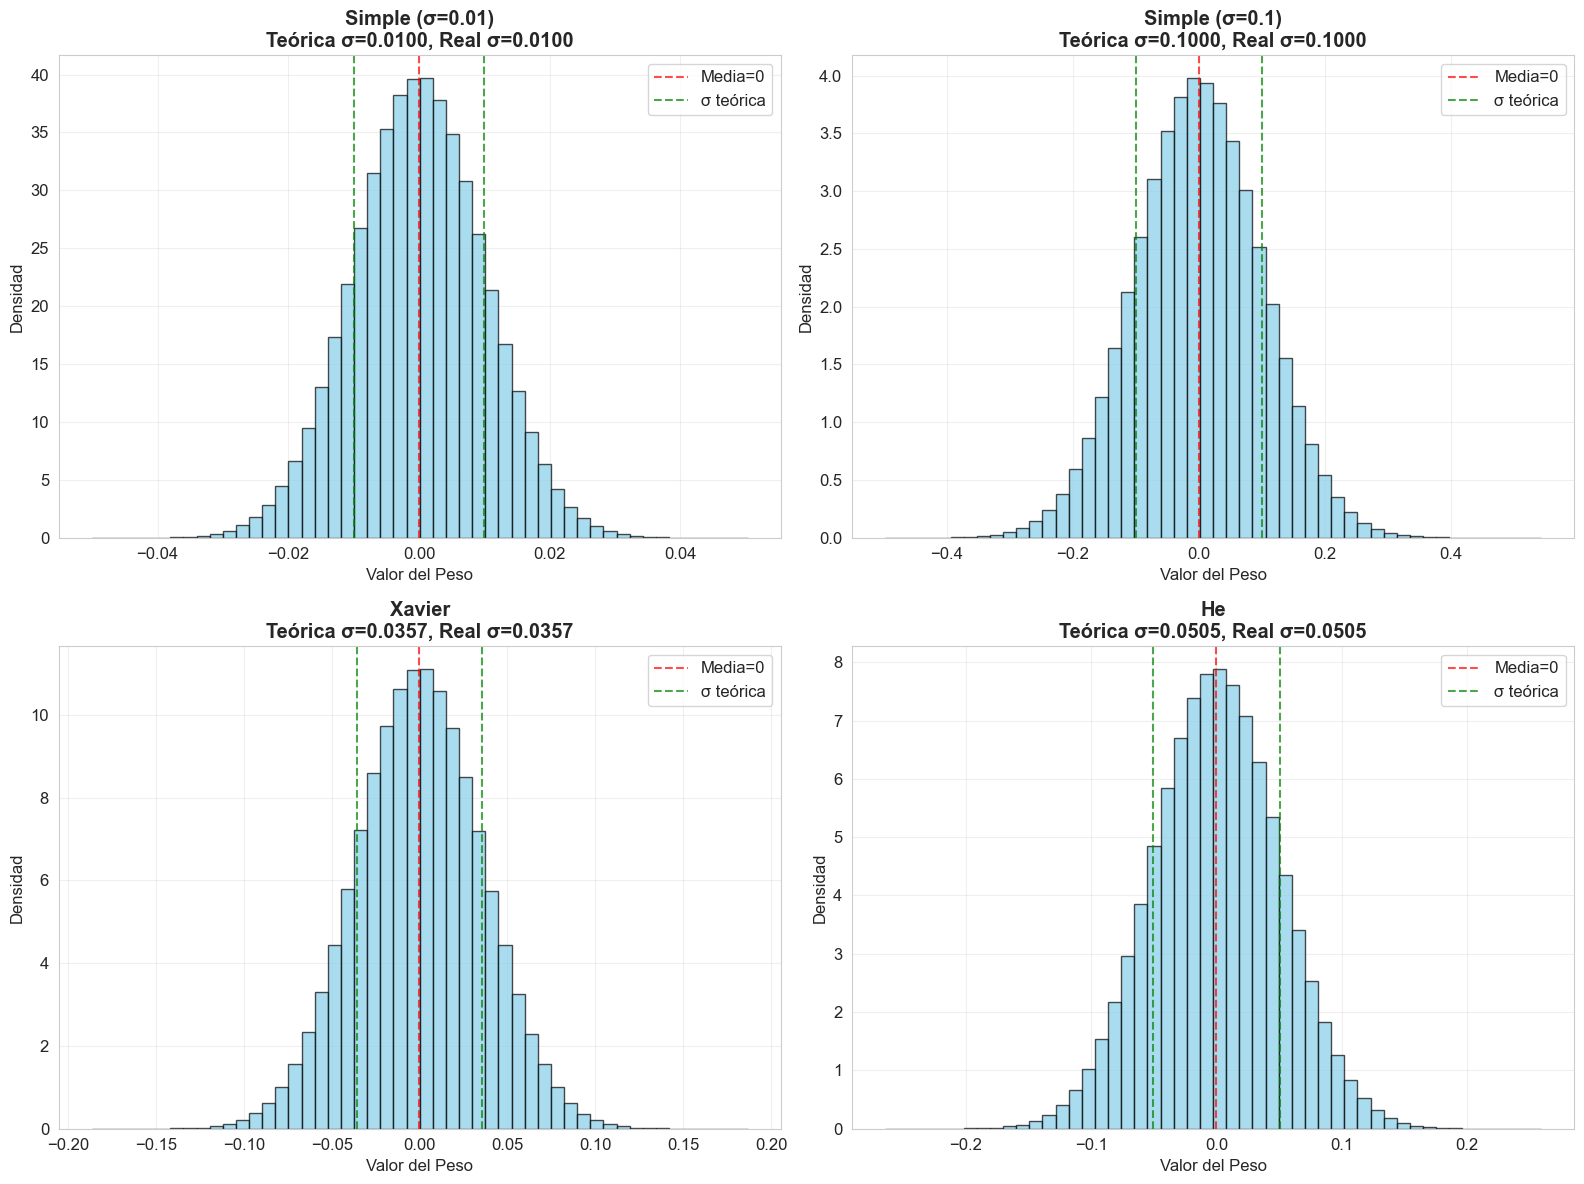


üéØ IMPACTO EN ACTIVACIONES INICIALES:
   üî¨ Tanh + Xavier:
      ‚Ä¢ A (pre-activaci√≥n): mean=-0.0005, std=0.1001
      ‚Ä¢ Z (post-activaci√≥n): mean=-0.0005, std=0.0991
      ‚Ä¢ Neuronas 'muertas' (Z=0): 0 de 40000
   üî¨ Tanh + He:
      ‚Ä¢ A (pre-activaci√≥n): mean=0.0004, std=0.1415
      ‚Ä¢ Z (post-activaci√≥n): mean=0.0004, std=0.1387
      ‚Ä¢ Neuronas 'muertas' (Z=0): 0 de 40000
   üî¨ ReLU + Xavier:
      ‚Ä¢ A (pre-activaci√≥n): mean=0.0003, std=0.0999
      ‚Ä¢ Z (post-activaci√≥n): mean=0.0400, std=0.0584
      ‚Ä¢ Neuronas 'muertas' (Z=0): 19977 de 40000
   üî¨ ReLU + He:
      ‚Ä¢ A (pre-activaci√≥n): mean=0.0003, std=0.1415
      ‚Ä¢ Z (post-activaci√≥n): mean=0.0566, std=0.0825
      ‚Ä¢ Neuronas 'muertas' (Z=0): 19915 de 40000

üí° RECOMENDACIONES PR√ÅCTICAS:
   üî∏ Usa He para ReLU y sus variantes (LeakyReLU, ELU, etc.)
   üî∏ Usa Xavier para Sigmoid y Tanh
   üî∏ Simple con œÉ peque√±a solo para redes muy superficiales
   üî∏ He es generalmente segu

In [8]:
# ============================================================================
# 7. M√âTODOS DE INICIALIZACI√ìN AVANZADOS  
# ============================================================================

print("\nüé≤ 7. M√âTODOS DE INICIALIZACI√ìN AVANZADOS")
print("="*45)

print("[Problema 2] Clasificaci√≥n del m√©todo de inicializaci√≥n")
print("[Problema 6] Valores de peso iniciales avanzados")

class SimpleInitializer:
    """
    Inicializaci√≥n simple con distribuci√≥n gaussiana
    
    M√©todo b√°sico que usa œÉ fijo para todos los pesos.
    
    Parameters
    ----------
    sigma : float
        Desviaci√≥n est√°ndar de la distribuci√≥n gaussiana
    """
    
    def __init__(self, sigma=0.01):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        Inicializar matriz de pesos
        
        Returns
        -------
        W : ndarray, shape (n_nodes1, n_nodes2)
            Matriz de pesos inicializados con N(0, œÉ¬≤)
        """
        return self.sigma * np.random.randn(n_nodes1, n_nodes2)
    
    def B(self, n_nodes2):
        """
        Inicializar vector de sesgos en cero
        
        Returns
        -------
        B : ndarray, shape (n_nodes2,)
            Vector de sesgos inicializados en 0
        """
        return np.zeros(n_nodes2)

class XavierInitializer:
    """
    [Problema 6] Inicializaci√≥n Xavier (Glorot)
    
    Dise√±ada para funciones sigmoid y tanh.
    Mantiene la varianza de activaciones y gradientes similar
    entre capas al inicio del entrenamiento.
    
    F√≥rmula: œÉ = ‚àö(1/n)
    donde n es el n√∫mero de nodos en la capa anterior
    
    Paper: "Understanding the difficulty of training deep feedforward 
    neural networks" - Glorot & Bengio (2010)
    """
    
    def W(self, n_nodes1, n_nodes2):
        """
        Inicializar con m√©todo Xavier
        
        La desviaci√≥n est√°ndar se ajusta seg√∫n el n√∫mero de nodos
        de entrada para mantener la varianza estable.
        """
        sigma = np.sqrt(1.0 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)
    
    def B(self, n_nodes2):
        """Sesgos en cero (est√°ndar)"""
        return np.zeros(n_nodes2)

class HeInitializer:
    """
    [Problema 6] Inicializaci√≥n He
    
    Dise√±ada espec√≠ficamente para funci√≥n ReLU y sus variantes.
    Compensa el hecho de que ReLU "mata" la mitad de las neuronas,
    duplicando la varianza inicial.
    
    F√≥rmula: œÉ = ‚àö(2/n)  
    donde n es el n√∫mero de nodos en la capa anterior
    
    Paper: "Delving Deep into Rectifiers: Surpassing Human-Level 
    Performance on ImageNet Classification" - He et al. (2015)
    """
    
    def W(self, n_nodes1, n_nodes2):
        """
        Inicializar con m√©todo He
        
        El factor ‚àö2 adicional compensa por ReLU que elimina
        aproximadamente la mitad de las activaciones.
        """
        sigma = np.sqrt(2.0 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)
    
    def B(self, n_nodes2):
        """Sesgos en cero"""
        return np.zeros(n_nodes2)

# An√°lisis te√≥rico y pr√°ctico de inicializadores
print("üßÆ AN√ÅLISIS TE√ìRICO DE INICIALIZADORES:")

n_nodes1, n_nodes2 = 784, 400

methods = [
    ("Simple (œÉ=0.01)", SimpleInitializer(0.01)),
    ("Simple (œÉ=0.1)", SimpleInitializer(0.1)),
    ("Xavier", XavierInitializer()),
    ("He", HeInitializer())
]

print(f"\nüìä COMPARACI√ìN CON {n_nodes1} ‚Üí {n_nodes2} neuronas:")

# Crear gr√°ficos comparativos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

theoretical_stds = []
actual_stds = []
method_names = []

for idx, (name, initializer) in enumerate(methods):
    # Generar pesos m√∫ltiples veces para estad√≠sticas estables
    all_weights = []
    for _ in range(10):
        W = initializer.W(n_nodes1, n_nodes2)
        all_weights.append(W.flatten())
    
    all_weights = np.concatenate(all_weights)
    
    # Calcular estad√≠sticas
    actual_std = np.std(all_weights)
    actual_mean = np.mean(all_weights)
    
    # Calcular std te√≥rica esperada
    if "Simple" in name:
        if "0.01" in name:
            theoretical_std = 0.01
        else:
            theoretical_std = 0.1
    elif "Xavier" in name:
        theoretical_std = np.sqrt(1.0 / n_nodes1)
    elif "He" in name:
        theoretical_std = np.sqrt(2.0 / n_nodes1)
    
    theoretical_stds.append(theoretical_std)
    actual_stds.append(actual_std)
    method_names.append(name)
    
    # Histograma
    if idx < 4:
        axes[idx].hist(all_weights, bins=50, density=True, alpha=0.7, 
                      color='skyblue', edgecolor='black')
        axes[idx].set_title(f'{name}\nTe√≥rica œÉ={theoretical_std:.4f}, '
                           f'Real œÉ={actual_std:.4f}', fontweight='bold')
        axes[idx].set_xlabel('Valor del Peso')
        axes[idx].set_ylabel('Densidad')
        axes[idx].grid(True, alpha=0.3)
        
        # L√≠neas de referencia
        axes[idx].axvline(0, color='red', linestyle='--', alpha=0.7, label='Media=0')
        axes[idx].axvline(theoretical_std, color='green', linestyle='--', 
                         alpha=0.7, label=f'œÉ te√≥rica')
        axes[idx].axvline(-theoretical_std, color='green', linestyle='--', alpha=0.7)
        axes[idx].legend()
    
    # Imprimir estad√≠sticas
    print(f"   ‚Ä¢ {name}:")
    print(f"     - Desviaci√≥n te√≥rica: {theoretical_std:.6f}")
    print(f"     - Desviaci√≥n real: {actual_std:.6f}")
    print(f"     - Media: {actual_mean:.6f}")
    print(f"     - Error te√≥rico: {abs(theoretical_std - actual_std):.6f}")

plt.tight_layout()
plt.show()

# Demostraci√≥n pr√°ctica del impacto en activaciones
print(f"\nüéØ IMPACTO EN ACTIVACIONES INICIALES:")

# Simular forward pass con diferentes inicializadores
batch_size = 100
X_demo = np.random.randn(batch_size, n_nodes1) * 0.1  # Entrada normalizada

activations_to_test = [
    ("Tanh + Xavier", Tanh(), XavierInitializer()),
    ("Tanh + He", Tanh(), HeInitializer()),
    ("ReLU + Xavier", ReLU(), XavierInitializer()),
    ("ReLU + He", ReLU(), HeInitializer())
]

for combo_name, activation, initializer in activations_to_test:
    # Crear pesos
    W = initializer.W(n_nodes1, n_nodes2)
    B = initializer.B(n_nodes2)
    
    # Forward pass manual
    A = X_demo @ W + B  # Antes de activaci√≥n
    Z = activation.forward(A)  # Despu√©s de activaci√≥n
    
    print(f"   üî¨ {combo_name}:")
    print(f"      ‚Ä¢ A (pre-activaci√≥n): mean={np.mean(A):.4f}, std={np.std(A):.4f}")
    print(f"      ‚Ä¢ Z (post-activaci√≥n): mean={np.mean(Z):.4f}, std={np.std(Z):.4f}")
    print(f"      ‚Ä¢ Neuronas 'muertas' (Z=0): {np.sum(Z == 0)} de {Z.size}")

# Recomendaciones pr√°cticas
print(f"\nüí° RECOMENDACIONES PR√ÅCTICAS:")

recommendations = [
    "üî∏ Usa He para ReLU y sus variantes (LeakyReLU, ELU, etc.)",
    "üî∏ Usa Xavier para Sigmoid y Tanh", 
    "üî∏ Simple con œÉ peque√±a solo para redes muy superficiales",
    "üî∏ He es generalmente seguro como inicializaci√≥n por defecto",
    "üî∏ En redes muy profundas, considera inicializaciones adaptativas",
    "üî∏ Batch Normalization reduce sensibilidad a inicializaci√≥n"
]

for rec in recommendations:
    print(f"   {rec}")

print("‚úÖ M√©todos de inicializaci√≥n avanzados implementados y analizados")



‚ö° 8. OPTIMIZADORES AVANZADOS
[Problema 3] Clasificaci√≥n de m√©todos de optimizaci√≥n
[Problema 7] M√©todo de optimizaci√≥n AdaGrad
üß™ SIMULACI√ìN COMPARATIVA DE OPTIMIZADORES:


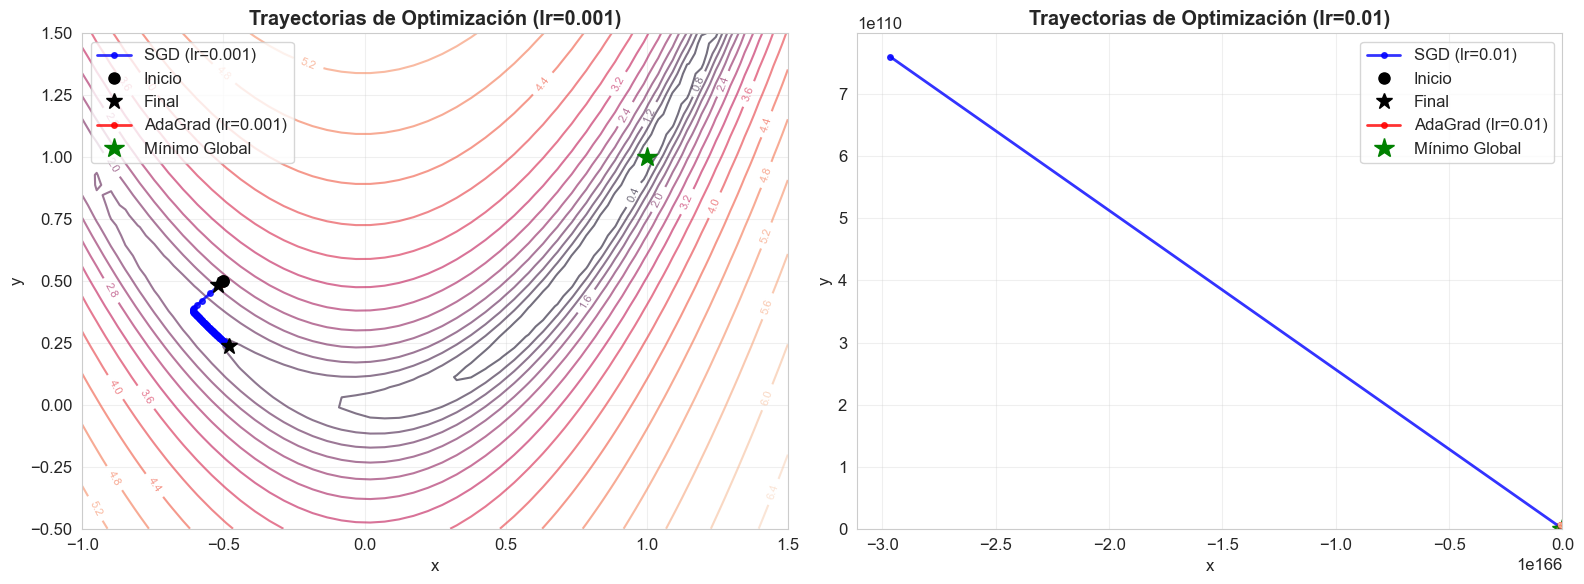


üìä AN√ÅLISIS DEL COMPORTAMIENTO ADAPTATIVO:


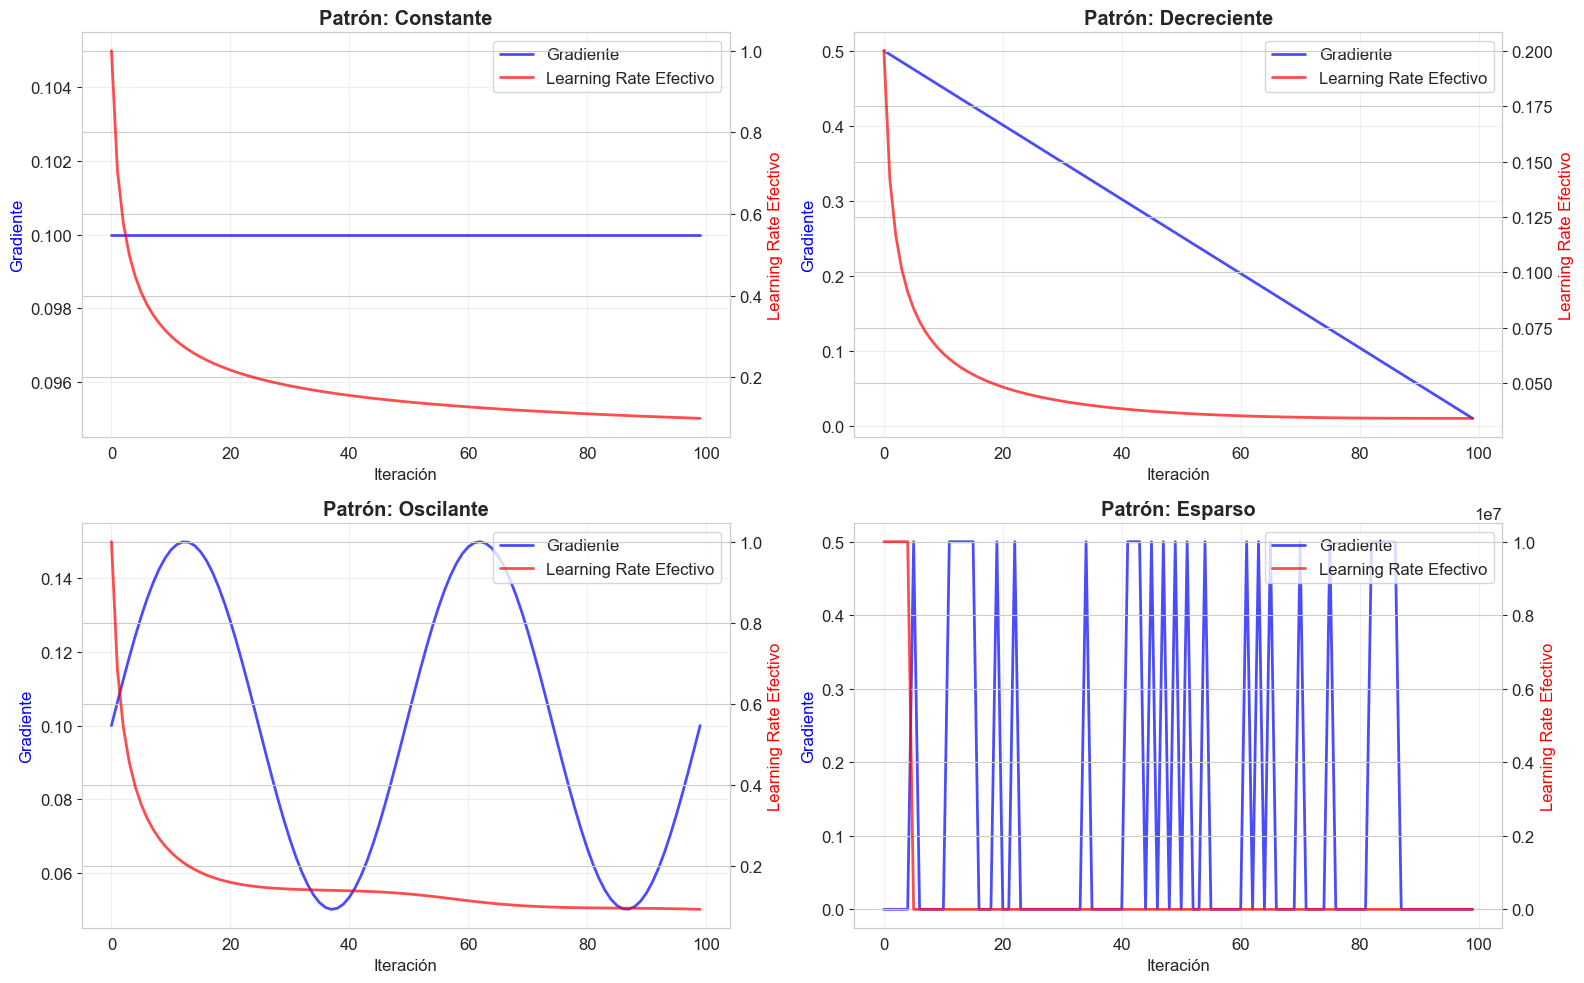


‚öñÔ∏è AN√ÅLISIS DETALLADO DE OPTIMIZADORES:

   üîµ SGD (Stochastic Gradient Descent):
      ‚úÖ Ventajas:
         ‚Ä¢ Simple y estable
         ‚Ä¢ Memoria eficiente
         ‚Ä¢ Bien entendido te√≥ricamente
         ‚Ä¢ Funciona bien con momentum
      ‚ùå Desventajas:
         ‚Ä¢ Learning rate fijo puede ser sub√≥ptimo
         ‚Ä¢ Convergencia lenta en valles estrechos
         ‚Ä¢ Sensible a escala de caracter√≠sticas

   üî¥ AdaGrad:
      ‚úÖ Ventajas:
         ‚Ä¢ Learning rate adaptativo por par√°metro
         ‚Ä¢ Excelente para gradientes esparsos
         ‚Ä¢ Menos sensible al learning rate inicial
         ‚Ä¢ Converge r√°pido inicialmente
      ‚ùå Desventajas:
         ‚Ä¢ Learning rate solo decrece (monot√≥nico)
         ‚Ä¢ Puede parar de aprender prematuramente
         ‚Ä¢ Uso de memoria adicional (historial)

üí° RECOMENDACIONES DE USO:
   üî∏ SGD: Baseline s√≥lido, especialmente con momentum
   üî∏ AdaGrad: Problemas con caracter√≠sticas escasas/irregulare

In [9]:
# ============================================================================
# 8. OPTIMIZADORES AVANZADOS
# ============================================================================

print("\n‚ö° 8. OPTIMIZADORES AVANZADOS")
print("="*35)

print("[Problema 3] Clasificaci√≥n de m√©todos de optimizaci√≥n")
print("[Problema 7] M√©todo de optimizaci√≥n AdaGrad")

class SGD:
    """
    Stochastic Gradient Descent (Descenso de Gradiente Estoc√°stico)
    
    El optimizador m√°s b√°sico. Actualiza par√°metros con tasa de
    aprendizaje fija para todos los par√°metros.
    
    F√≥rmula: Œ∏ = Œ∏ - Œ±‚àáŒ∏
    
    Parameters
    ----------
    lr : float
        Learning rate (tasa de aprendizaje)
    """
    
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, layer):
        """
        Actualizar par√°metros de una capa
        
        Parameters
        ----------
        layer : FC
            Instancia de capa con gradientes calculados
            
        Returns
        -------
        layer : FC  
            Capa con par√°metros actualizados
        """
        # Actualizaci√≥n cl√°sica de SGD
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return layer

class AdaGrad:
    """
    [Problema 7] Adaptive Gradient Algorithm
    
    Optimizador adaptativo que ajusta la tasa de aprendizaje
    individualmente para cada par√°metro basado en el historial
    de gradientes.
    
    Ventajas:
    - Learning rate adaptativo por par√°metro
    - Converge m√°s r√°pido en gradientes esparsos
    - Menos sensible al learning rate inicial
    
    Desventajas:  
    - Learning rate siempre decrece (nunca aumenta)
    - Puede volverse muy peque√±o y parar el aprendizaje
    
    F√≥rmulas:
    H_t = H_{t-1} + ‚àáŒ∏_t ‚äô ‚àáŒ∏_t  (suma acumulada de gradientes¬≤)
    Œ∏_{t+1} = Œ∏_t - (Œ± / ‚àö(H_t + Œµ)) ‚äô ‚àáŒ∏_t
    
    donde ‚äô es producto elemento a elemento (Hadamard)
    
    Paper: "Adaptive Subgradient Methods for Online Learning and 
    Stochastic Optimization" - Duchi et al. (2011)
    """
    
    def __init__(self, lr=0.01, eps=1e-8):
        """
        Parameters
        ----------
        lr : float
            Learning rate inicial
        eps : float
            Peque√±a constante para evitar divisi√≥n por cero
        """
        self.lr = lr
        self.eps = eps
        # El historial de gradientes se inicializa din√°micamente
        # para cada capa en el primer uso
    
    def update(self, layer):
        """
        Actualizar usando AdaGrad
        
        Cada par√°metro tiene su propio learning rate adaptativo
        basado en la historia de sus gradientes al cuadrado.
        """
        # Inicializar historial de gradientes en primer uso
        if not hasattr(layer, 'H_W'):
            layer.H_W = np.zeros_like(layer.W)
            layer.H_B = np.zeros_like(layer.B)
        
        # Acumular gradientes al cuadrado (historial)
        layer.H_W += layer.dW ** 2  # Elemento a elemento
        layer.H_B += layer.dB ** 2
        
        # Actualizar par√°metros con learning rate adaptativo
        # lr_adaptativo = lr / ‚àö(historial + Œµ)
        layer.W -= self.lr * layer.dW / (np.sqrt(layer.H_W) + self.eps)
        layer.B -= self.lr * layer.dB / (np.sqrt(layer.H_B) + self.eps)
        
        return layer

# Comparaci√≥n visual de optimizadores
print("üß™ SIMULACI√ìN COMPARATIVA DE OPTIMIZADORES:")

# Funci√≥n de prueba: par√°bola 2D con m√≠nimo global
def rosenbrock_2d(x, y):
    """Funci√≥n Rosenbrock simplificada para prueba"""
    return (1 - x)**2 + 100*(y - x**2)**2

def rosenbrock_gradient(x, y):
    """Gradiente de la funci√≥n Rosenbrock"""
    dx = -2*(1 - x) - 400*x*(y - x**2)
    dy = 200*(y - x**2)
    return np.array([dx, dy])

# Simular optimizaci√≥n en funci√≥n 2D
def simulate_optimization(optimizer_class, lr, start_point, iterations=50):
    """Simular optimizaci√≥n en funci√≥n 2D"""
    # Simular una "capa" con par√°metros 2D
    class MockLayer:
        def __init__(self):
            self.W = np.array([[start_point[0]]])
            self.B = np.array([start_point[1]]) 
            self.dW = None
            self.dB = None
    
    layer = MockLayer()
    optimizer = optimizer_class(lr=lr)
    
    history = []
    
    for i in range(iterations):
        # Posici√≥n actual
        x, y = layer.W[0,0], layer.B[0]
        history.append([x, y])
        
        # Calcular gradientes
        grad = rosenbrock_gradient(x, y)
        layer.dW = np.array([[grad[0]]])
        layer.dB = np.array([grad[1]])
        
        # Actualizar con optimizador
        layer = optimizer.update(layer)
        
        # Criterio de parada (cerca del m√≠nimo)
        if np.linalg.norm([x - 1, y - 1]) < 0.01:
            break
    
    return np.array(history)

# Ejecutar simulaci√≥n
start_point = [-0.5, 0.5]  # Punto inicial
learning_rates = [0.001, 0.01]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for lr_idx, lr in enumerate(learning_rates):
    ax = axes[lr_idx]
    
    # Crear contorno de la funci√≥n
    x_range = np.linspace(-1, 1.5, 50)
    y_range = np.linspace(-0.5, 1.5, 50)
    X_grid, Y_grid = np.meshgrid(x_range, y_range)
    Z_grid = rosenbrock_2d(X_grid, Y_grid)
    
    # Dibujar contorno (logar√≠tmico para mejor visualizaci√≥n)
    contour = ax.contour(X_grid, Y_grid, np.log(Z_grid + 1), levels=20, alpha=0.6)
    ax.clabel(contour, inline=True, fontsize=8)
    
    # Optimizadores a comparar
    optimizers = [
        ("SGD", SGD, 'blue'),
        ("AdaGrad", AdaGrad, 'red')
    ]
    
    for opt_name, opt_class, color in optimizers:
        history = simulate_optimization(opt_class, lr, start_point, iterations=100)
        
        # Plotear trayectoria
        ax.plot(history[:, 0], history[:, 1], 'o-', color=color, 
               linewidth=2, markersize=4, alpha=0.8, label=f'{opt_name} (lr={lr})')
        
        # Marcar inicio y fin
        ax.plot(history[0, 0], history[0, 1], 'ko', markersize=8, label='Inicio' if opt_name == 'SGD' else "")
        ax.plot(history[-1, 0], history[-1, 1], 'k*', markersize=12, label='Final' if opt_name == 'SGD' else "")
    
    # Marcar m√≠nimo global
    ax.plot(1, 1, 'g*', markersize=15, label='M√≠nimo Global')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Trayectorias de Optimizaci√≥n (lr={lr})', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# An√°lisis de comportamiento adaptativo de AdaGrad
print(f"\nüìä AN√ÅLISIS DEL COMPORTAMIENTO ADAPTATIVO:")

# Simular gradientes con diferentes patrones
def analyze_adagrad_behavior():
    """Analizar c√≥mo AdaGrad adapta el learning rate"""
    
    # Crear gradientes simulados con diferentes patrones
    iterations = 100
    patterns = {
        "Constante": np.ones(iterations) * 0.1,
        "Decreciente": np.linspace(0.5, 0.01, iterations),
        "Oscilante": 0.1 + 0.05 * np.sin(np.linspace(0, 4*np.pi, iterations)),
        "Esparso": np.random.choice([0, 0, 0, 0.5], iterations)  # Mayormente ceros
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, (pattern_name, gradients) in enumerate(patterns.items()):
        # Simular AdaGrad
        lr = 0.1
        eps = 1e-8
        H = 0  # Historial
        lr_effective = []  # Learning rate efectivo
        
        for grad in gradients:
            H += grad**2
            lr_eff = lr / (np.sqrt(H) + eps)
            lr_effective.append(lr_eff)
        
        # Plot gradientes y learning rate efectivo
        ax = axes[idx]
        
        ax2 = ax.twinx()
        
        line1 = ax.plot(gradients, 'b-', alpha=0.7, linewidth=2, label='Gradiente')
        line2 = ax2.plot(lr_effective, 'r-', alpha=0.7, linewidth=2, label='Learning Rate Efectivo')
        
        ax.set_xlabel('Iteraci√≥n')
        ax.set_ylabel('Gradiente', color='blue')
        ax2.set_ylabel('Learning Rate Efectivo', color='red')
        ax.set_title(f'Patr√≥n: {pattern_name}', fontweight='bold')
        
        # Combinar leyendas
        lines = line1 + line2
        labels = [l.get_label() for l in lines]
        ax.legend(lines, labels, loc='upper right')
        
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

analyze_adagrad_behavior()

# Ventajas y desventajas detalladas
print(f"\n‚öñÔ∏è AN√ÅLISIS DETALLADO DE OPTIMIZADORES:")

print(f"\n   üîµ SGD (Stochastic Gradient Descent):")
print(f"      ‚úÖ Ventajas:")
print(f"         ‚Ä¢ Simple y estable")
print(f"         ‚Ä¢ Memoria eficiente") 
print(f"         ‚Ä¢ Bien entendido te√≥ricamente")
print(f"         ‚Ä¢ Funciona bien con momentum")
print(f"      ‚ùå Desventajas:")
print(f"         ‚Ä¢ Learning rate fijo puede ser sub√≥ptimo")
print(f"         ‚Ä¢ Convergencia lenta en valles estrechos")
print(f"         ‚Ä¢ Sensible a escala de caracter√≠sticas")

print(f"\n   üî¥ AdaGrad:")
print(f"      ‚úÖ Ventajas:")
print(f"         ‚Ä¢ Learning rate adaptativo por par√°metro")
print(f"         ‚Ä¢ Excelente para gradientes esparsos")
print(f"         ‚Ä¢ Menos sensible al learning rate inicial")
print(f"         ‚Ä¢ Converge r√°pido inicialmente")
print(f"      ‚ùå Desventajas:")
print(f"         ‚Ä¢ Learning rate solo decrece (monot√≥nico)")
print(f"         ‚Ä¢ Puede parar de aprender prematuramente")
print(f"         ‚Ä¢ Uso de memoria adicional (historial)")

print(f"\nüí° RECOMENDACIONES DE USO:")

usage_recommendations = [
    "üî∏ SGD: Baseline s√≥lido, especialmente con momentum",
    "üî∏ AdaGrad: Problemas con caracter√≠sticas escasas/irregulares",
    "üî∏ Para deep learning moderno: Adam o RMSprop (pr√≥ximos sprints)",
    "üî∏ Siempre probar m√∫ltiples optimizadores y learning rates",
    "üî∏ Learning rate scheduling puede mejorar SGD significativamente"
]

for rec in usage_recommendations:
    print(f"   {rec}")

print("‚úÖ Optimizadores avanzados implementados y analizados")


In [11]:
# ============================================================================
# 9. RED NEURONAL PROFUNDA MODULAR COMPLETA
# ============================================================================

print("\nüß† 9. RED NEURONAL PROFUNDA MODULAR COMPLETA")
print("="*50)

print("[Problema 8] Clase ScratchDeepNeuralNetworkClassifier completa")

class ScratchDeepNeuralNetworkClassifier:
    """
    Red Neuronal Profunda Modular y Flexible
    
    Permite crear redes de cualquier arquitectura combinando:
    - Diferentes n√∫meros de capas
    - Distintas funciones de activaci√≥n por capa
    - M√∫ltiples m√©todos de inicializaci√≥n
    - Varios optimizadores
    
    Esta implementaci√≥n modular permite f√°cil experimentaci√≥n y extensi√≥n.
    
    Parameters
    ----------
    layers_config : list of dict
        Configuraci√≥n de cada capa oculta. Cada dict debe contener:
        - 'n_nodes': int, n√∫mero de neuronas
        - 'activation': str, tipo de activaci√≥n ('sigmoid', 'tanh', 'relu')
        - 'initializer': str, m√©todo de inicializaci√≥n ('simple', 'xavier', 'he')
    optimizer_config : dict
        Configuraci√≥n del optimizador:
        - 'type': str, tipo ('SGD', 'AdaGrad')
        - 'eps': float, para AdaGrad (opcional)
    lr : float, default=0.01
        Learning rate
    epochs : int, default=10
        N√∫mero de √©pocas
    batch_size : int, default=20
        Tama√±o del mini-lote
    verbose : bool, default=True
        Si mostrar progreso durante entrenamiento
    """
    
    def __init__(self, layers_config, optimizer_config={'type': 'SGD'}, 
                 lr=0.01, epochs=10, batch_size=20, verbose=True):
        
        self.layers_config = layers_config
        self.optimizer_config = optimizer_config
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        
        # Componentes de la red (se inicializar√°n en fit)
        self.layers = []  # Capas FC
        self.activations = []  # Funciones de activaci√≥n
        
        # Historial de entrenamiento
        self.train_loss_history = []
        self.val_loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []
        
        self.is_fitted = False
        self.n_features = None
        self.n_classes = None
    
    def _create_optimizer(self):
        """Crear instancia del optimizador seg√∫n configuraci√≥n"""
        if self.optimizer_config['type'] == 'SGD':
            return SGD(lr=self.lr)
        elif self.optimizer_config['type'] == 'AdaGrad':
            eps = self.optimizer_config.get('eps', 1e-8)
            return AdaGrad(lr=self.lr, eps=eps)
        else:
            raise ValueError(f"Optimizador '{self.optimizer_config['type']}' no soportado")
    
    def _create_initializer(self, init_type):
        """Crear instancia del inicializador"""
        if init_type == 'simple':
            return SimpleInitializer(0.01)
        elif init_type == 'xavier':
            return XavierInitializer()
        elif init_type == 'he':
            return HeInitializer()
        else:
            raise ValueError(f"Inicializador '{init_type}' no soportado")
    
    def _create_activation(self, activation_type):
        """Crear instancia de funci√≥n de activaci√≥n"""
        if activation_type == 'sigmoid':
            return Sigmoid()
        elif activation_type == 'tanh':
            return Tanh()
        elif activation_type == 'relu':
            return ReLU()
        elif activation_type == 'softmax':
            return Softmax()
        else:
            raise ValueError(f"Activaci√≥n '{activation_type}' no soportada")
    
    def _build_network(self, n_features, n_classes):
        """
        Construir la red neuronal seg√∫n la configuraci√≥n
        """
        self.layers = []
        self.activations = []
        
        if len(self.layers_config) == 0:
            raise ValueError("Debe especificar al menos una capa oculta")
        
        # Primera capa: desde caracter√≠sticas de entrada
        first_config = self.layers_config[0]
        initializer = self._create_initializer(first_config['initializer'])
        optimizer = self._create_optimizer()
        
        self.layers.append(FC(n_features, first_config['n_nodes'], initializer, optimizer))
        self.activations.append(self._create_activation(first_config['activation']))
        
        # Capas ocultas intermedias
        for i in range(1, len(self.layers_config)):
            config = self.layers_config[i]
            prev_nodes = self.layers_config[i-1]['n_nodes']
            
            initializer = self._create_initializer(config['initializer'])
            optimizer = self._create_optimizer()  # Nueva instancia
            
            self.layers.append(FC(prev_nodes, config['n_nodes'], initializer, optimizer))
            self.activations.append(self._create_activation(config['activation']))
        
        # Capa de salida
        last_hidden_nodes = self.layers_config[-1]['n_nodes']
        output_initializer = self._create_initializer('xavier')  # Xavier por defecto para salida
        output_optimizer = self._create_optimizer()
        
        self.layers.append(FC(last_hidden_nodes, n_classes, output_initializer, output_optimizer))
        self.activations.append(Softmax())  # Siempre softmax para clasificaci√≥n
    
    def _forward_propagation(self, X):
        """
        Propagaci√≥n hacia adelante a trav√©s de toda la red
        
        Returns
        -------
        layer_outputs : list of tuples
            Lista de (A, Z) para cada capa donde:
            A = salida antes de activaci√≥n
            Z = salida despu√©s de activaci√≥n
        """
        current_input = X
        layer_outputs = []
        
        for layer, activation in zip(self.layers, self.activations):
            # Forward en capa FC
            A = layer.forward(current_input)
            
            # Forward en funci√≥n de activaci√≥n
            Z = activation.forward(A)
            
            layer_outputs.append((A, Z))
            current_input = Z
        
        return layer_outputs
    
    def _backward_propagation(self, layer_outputs, Y):
        """
        Propagaci√≥n hacia atr√°s a trav√©s de toda la red
        
        Parameters
        ----------
        layer_outputs : list of tuples
            Salidas de forward propagation
        Y : ndarray
            Etiquetas verdaderas (one-hot encoded)
        """
        # Empezar desde la √∫ltima capa (salida)
        final_output = layer_outputs[-1][1]  # Z de la √∫ltima capa
        
        # Gradiente inicial: softmax + cross-entropy combinados
        dA = self.activations[-1].backward(final_output, Y)
        
        # Propagaci√≥n hacia atr√°s capa por capa
        for i in reversed(range(len(self.layers))):
            # Backward en capa FC (actualiza par√°metros internamente)
            dZ = self.layers[i].backward(dA)
            
            # Si no es la primera capa, backward en activaci√≥n anterior
            if i > 0:
                dA = self.activations[i-1].backward(dZ)
    
    def _cross_entropy_loss(self, y_true, y_pred):
        """Calcular cross-entropy loss"""
        epsilon = 1e-7
        y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(np.sum(y_true * np.log(y_pred_clipped), axis=1))
    
    def _calculate_accuracy(self, y_true, y_pred):
        """Calcular accuracy"""
        y_true_labels = np.argmax(y_true, axis=1)
        y_pred_labels = np.argmax(y_pred, axis=1)
        return np.mean(y_true_labels == y_pred_labels)
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Entrenar la red neuronal profunda
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Datos de entrenamiento
        y : ndarray, shape (n_samples, n_classes)
            Etiquetas one-hot encoded
        X_val : ndarray, optional
            Datos de validaci√≥n
        y_val : ndarray, optional
            Etiquetas de validaci√≥n
        """
        # Validar entrada
        X = np.asarray(X, dtype=np.float32)
        y = np.asarray(y, dtype=np.float32)
        
        if X.ndim != 2 or y.ndim != 2:
            raise ValueError("X debe ser 2D y y debe ser 2D (one-hot encoded)")
        
        self.n_features = X.shape[1]
        self.n_classes = y.shape[1]
        
        if self.verbose:
            print(f"üèóÔ∏è Construyendo Red Neuronal Profunda:")
            architecture_str = str(self.n_features)
            for config in self.layers_config:
                architecture_str += f" ‚Üí {config['n_nodes']}"
            architecture_str += f" ‚Üí {self.n_classes}"
            
            print(f"   ‚Ä¢ Arquitectura: {architecture_str}")
            print(f"   ‚Ä¢ Capas ocultas: {len(self.layers_config)}")
            print(f"   ‚Ä¢ Activaciones: {[config['activation'] for config in self.layers_config]} + softmax")
            print(f"   ‚Ä¢ Inicializadores: {[config['initializer'] for config in self.layers_config]}")
            print(f"   ‚Ä¢ Optimizador: {self.optimizer_config['type']}")
            print(f"   ‚Ä¢ Learning rate: {self.lr}")
            print(f"   ‚Ä¢ √âpocas: {self.epochs}, Batch size: {self.batch_size}")
        
        # Construir la red
        self._build_network(self.n_features, self.n_classes)
        
        if self.verbose:
            total_params = sum(layer.W.size + layer.B.size for layer in self.layers)
            print(f"   ‚Ä¢ Par√°metros totales: {total_params:,}")
        
        # Entrenamiento por √©pocas
        for epoch in range(self.epochs):
            # Crear mini-batch iterator
            mini_batch_iterator = GetMiniBatch(X, y, batch_size=self.batch_size, seed=epoch)
            
            epoch_train_loss = 0
            epoch_train_correct = 0
            batch_count = 0
            
            # Entrenar en mini-lotes
            for mini_X, mini_y in mini_batch_iterator:
                # Forward propagation
                layer_outputs = self._forward_propagation(mini_X)
                final_output = layer_outputs[-1][1]  # Predicciones
                
                # Calcular loss
                loss = self._cross_entropy_loss(mini_y, final_output)
                epoch_train_loss += loss
                
                # Calcular accuracy del batch
                batch_acc = self._calculate_accuracy(mini_y, final_output)
                epoch_train_correct += batch_acc * len(mini_X)
                
                # Backward propagation
                self._backward_propagation(layer_outputs, mini_y)
                
                batch_count += 1
            
            # M√©tricas de √©poca
            avg_train_loss = epoch_train_loss / batch_count
            train_accuracy = epoch_train_correct / len(X)
            
            self.train_loss_history.append(avg_train_loss)
            self.train_acc_history.append(train_accuracy)
            
            # Validaci√≥n si se proporciona
            val_loss, val_accuracy = None, None
            if X_val is not None and y_val is not None:
                val_predictions = self.predict(X_val)
                val_loss = self._cross_entropy_loss(y_val, val_predictions)
                val_accuracy = self._calculate_accuracy(y_val, val_predictions)
                
                self.val_loss_history.append(val_loss)
                self.val_acc_history.append(val_accuracy)
            
            # Imprimir progreso
            if self.verbose and (epoch + 1) % max(1, self.epochs // 10) == 0:
                msg = f"   √âpoca {epoch+1:3d}: Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}"
                if val_loss is not None:
                    msg += f", Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}"
                print(msg)
        
        self.is_fitted = True
        
        if self.verbose:
            print("‚úÖ Entrenamiento completado")
            final_train_acc = self.train_acc_history[-1]
            final_val_acc = self.val_acc_history[-1] if self.val_acc_history else None
            print(f"   ‚Ä¢ Accuracy final entrenamiento: {final_train_acc:.4f}")
            if final_val_acc is not None:
                print(f"   ‚Ä¢ Accuracy final validaci√≥n: {final_val_acc:.4f}")
    
    def predict(self, X):
        """
        Realizar predicciones
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Datos para predecir
            
        Returns
        -------
        predictions : ndarray, shape (n_samples, n_classes)
            Probabilidades predichas
        """
        if not self.is_fitted:
            raise ValueError("El modelo debe ser entrenado antes de predecir")
        
        X = np.asarray(X, dtype=np.float32)
        if X.ndim != 2:
            raise ValueError("X debe ser una matriz 2D")
        
        # Forward propagation sin almacenar outputs intermedios
        current_input = X
        for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(current_input)
            current_input = activation.forward(A)
        
        return current_input
    
    def predict_classes(self, X):
        """
        Predecir clases (etiquetas enteras)
        """
        probabilities = self.predict(X)
        return np.argmax(probabilities, axis=1)
    
    def get_network_info(self):
        """
        Obtener informaci√≥n detallada de la red
        
        Returns
        -------
        info : dict
            Informaci√≥n sobre la arquitectura y par√°metros
        """
        if not self.is_fitted:
            return {"status": "not_fitted"}
        
        layer_info = []
        total_params = 0
        
        for i, (layer, activation) in enumerate(zip(self.layers, self.activations)):
            params = layer.W.size + layer.B.size
            total_params += params
            
            layer_info.append({
                'layer': i,
                'type': 'FC',
                'input_size': layer.n_nodes1,
                'output_size': layer.n_nodes2,
                'activation': type(activation).__name__,
                'parameters': params,
                'weights_shape': layer.W.shape,
                'bias_shape': layer.B.shape
            })
        
        return {
            'status': 'fitted',
            'architecture': f"{self.n_features} ‚Üí {' ‚Üí '.join([str(config['n_nodes']) for config in self.layers_config])} ‚Üí {self.n_classes}",
            'total_layers': len(self.layers),
            'total_parameters': total_params,
            'optimizer': self.optimizer_config['type'],
            'learning_rate': self.lr,
            'layer_details': layer_info
        }

# Demostraci√≥n de la red neuronal profunda
print("üß™ DEMOSTRACI√ìN DE RED NEURONAL PROFUNDA MODULAR:")

# Configuraci√≥n de ejemplo: red de 4 capas ocultas
example_config = [
    {'n_nodes': 512, 'activation': 'relu', 'initializer': 'he'},
    {'n_nodes': 256, 'activation': 'relu', 'initializer': 'he'},
    {'n_nodes': 128, 'activation': 'relu', 'initializer': 'he'},
    {'n_nodes': 64, 'activation': 'tanh', 'initializer': 'xavier'}
]

# Crear modelo de demostraci√≥n
demo_model = ScratchDeepNeuralNetworkClassifier(
    layers_config=example_config,
    optimizer_config={'type': 'AdaGrad', 'eps': 1e-8},
    lr=0.01,
    epochs=5,
    batch_size=32,
    verbose=True
)

# Mostrar informaci√≥n antes del entrenamiento
print(f"\nüìã CONFIGURACI√ìN DEL MODELO DE DEMOSTRACI√ìN:")
for i, config in enumerate(example_config):
    print(f"   ‚Ä¢ Capa {i+1}: {config['n_nodes']} neuronas, {config['activation']}, init: {config['initializer']}")

print(f"   ‚Ä¢ Optimizador: {demo_model.optimizer_config}")
print(f"   ‚Ä¢ Hiperpar√°metros: lr={demo_model.lr}, epochs={demo_model.epochs}, batch_size={demo_model.batch_size}")

print("\n‚úÖ Red neuronal profunda modular completamente implementada")
print("üöÄ Lista para entrenar con cualquier arquitectura y configuraci√≥n")



üß† 9. RED NEURONAL PROFUNDA MODULAR COMPLETA
[Problema 8] Clase ScratchDeepNeuralNetworkClassifier completa
üß™ DEMOSTRACI√ìN DE RED NEURONAL PROFUNDA MODULAR:

üìã CONFIGURACI√ìN DEL MODELO DE DEMOSTRACI√ìN:
   ‚Ä¢ Capa 1: 512 neuronas, relu, init: he
   ‚Ä¢ Capa 2: 256 neuronas, relu, init: he
   ‚Ä¢ Capa 3: 128 neuronas, relu, init: he
   ‚Ä¢ Capa 4: 64 neuronas, tanh, init: xavier
   ‚Ä¢ Optimizador: {'type': 'AdaGrad', 'eps': 1e-08}
   ‚Ä¢ Hiperpar√°metros: lr=0.01, epochs=5, batch_size=32

‚úÖ Red neuronal profunda modular completamente implementada
üöÄ Lista para entrenar con cualquier arquitectura y configuraci√≥n


In [12]:
# ============================================================================
# 10. VERIFICACI√ìN Y EXPERIMENTACI√ìN
# ============================================================================

print("\nüî¨ 10. VERIFICACI√ìN Y EXPERIMENTACI√ìN")
print("="*40)

print("[Problema 9] Aprendizaje y estimaci√≥n con diferentes configuraciones")

# Configuraciones experimentales para comparar
experimental_configs = [
    {
        'name': 'Red Shallow (Cl√°sica)',
        'config': [
            {'n_nodes': 400, 'activation': 'tanh', 'initializer': 'xavier'},
            {'n_nodes': 200, 'activation': 'tanh', 'initializer': 'xavier'}
        ],
        'optimizer': {'type': 'SGD'},
        'lr': 0.01
    },
    {
        'name': 'Red Deep ReLU + He',
        'config': [
            {'n_nodes': 512, 'activation': 'relu', 'initializer': 'he'},
            {'n_nodes': 256, 'activation': 'relu', 'initializer': 'he'},
            {'n_nodes': 128, 'activation': 'relu', 'initializer': 'he'},
            {'n_nodes': 64, 'activation': 'relu', 'initializer': 'he'}
        ],
        'optimizer': {'type': 'AdaGrad', 'eps': 1e-8},
        'lr': 0.01
    },
    {
        'name': 'Red Mixta (Sigmoid + Tanh)',
        'config': [
            {'n_nodes': 256, 'activation': 'sigmoid', 'initializer': 'xavier'},
            {'n_nodes': 128, 'activation': 'tanh', 'initializer': 'xavier'},
            {'n_nodes': 64, 'activation': 'sigmoid', 'initializer': 'xavier'}
        ],
        'optimizer': {'type': 'SGD'},
        'lr': 0.001  # Menor para funciones sensibles
    },
    {
        'name': 'Red Ancha (Wide)',
        'config': [
            {'n_nodes': 800, 'activation': 'relu', 'initializer': 'he'},
            {'n_nodes': 400, 'activation': 'relu', 'initializer': 'he'}
        ],
        'optimizer': {'type': 'AdaGrad'},
        'lr': 0.005
    }
]

# Entrenar y evaluar cada configuraci√≥n
experiment_results = []

print("üèÉ‚Äç‚ôÇÔ∏è EJECUTANDO EXPERIMENTOS:")

for exp in experimental_configs:
    print(f"\n{'='*60}")
    print(f"üß™ EXPERIMENTO: {exp['name']}")
    print(f"{'='*60}")
    
    # Crear modelo
    model = ScratchDeepNeuralNetworkClassifier(
        layers_config=exp['config'],
        optimizer_config=exp['optimizer'],
        lr=exp['lr'],
        epochs=15,
        batch_size=32,
        verbose=True
    )
    
    # Entrenar
    print(f"üèãÔ∏è Entrenando {exp['name']}...")
    model.fit(X_train, y_train, X_val, y_val)
    
    # Evaluar
    train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_val)
    test_predictions = model.predict(X_test_flat)
    
    # Calcular m√©tricas
    train_acc = accuracy_score(y_train_labels, np.argmax(train_predictions, axis=1))
    val_acc = accuracy_score(y_val_labels, np.argmax(val_predictions, axis=1))
    test_acc = accuracy_score(y_test_original, np.argmax(test_predictions, axis=1))
    
    # Informaci√≥n de la red
    network_info = model.get_network_info()
    
    # Almacenar resultados
    result = {
        'name': exp['name'],
        'architecture': network_info['architecture'],
        'total_params': network_info['total_parameters'],
        'optimizer': exp['optimizer']['type'],
        'learning_rate': exp['lr'],
        'train_accuracy': train_acc,
        'val_accuracy': val_acc,
        'test_accuracy': test_acc,
        'final_train_loss': model.train_loss_history[-1],
        'final_val_loss': model.val_loss_history[-1],
        'overfitting_gap': train_acc - val_acc,
        'model': model
    }
    
    experiment_results.append(result)
    
    print(f"\nüìä RESULTADOS {exp['name']}:")
    print(f"   ‚Ä¢ Arquitectura: {result['architecture']}")
    print(f"   ‚Ä¢ Par√°metros: {result['total_params']:,}")
    print(f"   ‚Ä¢ Train Accuracy: {train_acc:.4f}")
    print(f"   ‚Ä¢ Val Accuracy: {val_acc:.4f}")
    print(f"   ‚Ä¢ Test Accuracy: {test_acc:.4f}")
    print(f"   ‚Ä¢ Overfitting Gap: {result['overfitting_gap']:.4f}")

# Crear tabla comparativa
print(f"\nüìä TABLA COMPARATIVA DE EXPERIMENTOS:")
print("="*100)

comparison_df = pd.DataFrame([
    {
        'Modelo': r['name'],
        'Capas': len(r['model'].layers_config),
        'Par√°metros': f"{r['total_params']:,}",
        'Optimizador': r['optimizer'],
        'LR': r['learning_rate'],
        'Train Acc': f"{r['train_accuracy']:.4f}",
        'Val Acc': f"{r['val_accuracy']:.4f}",
        'Test Acc': f"{r['test_accuracy']:.4f}",
        'Gap': f"{r['overfitting_gap']:.4f}"
    }
    for r in experiment_results
])

print(comparison_df.to_string(index=False))

# Visualizaci√≥n de resultados
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracies por modelo
models_names = [r['name'] for r in experiment_results]
train_accs = [r['train_accuracy'] for r in experiment_results]
val_accs = [r['val_accuracy'] for r in experiment_results]
test_accs = [r['test_accuracy'] for r in experiment_results]

x_pos = np.arange(len(models_names))
width = 0.25

bars1 = axes[0,0].bar(x_pos - width, train_accs, width, label='Train', alpha=0.8, color='blue')
bars2 = axes[0,0].bar(x_pos, val_accs, width, label='Validation', alpha=0.8, color='orange')
bars3 = axes[0,0].bar(x_pos + width, test_accs, width, label='Test', alpha=0.8, color='green')

axes[0,0].set_xlabel('Modelo')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_title('Comparaci√≥n de Accuracies', fontweight='bold')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(models_names, rotation=45, ha='right')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Overfitting gap
gaps = [r['overfitting_gap'] for r in experiment_results]
colors = ['red' if gap > 0.05 else 'green' for gap in gaps]

bars_gap = axes[0,1].bar(models_names, gaps, alpha=0.7, color=colors)
axes[0,1].set_xlabel('Modelo')
axes[0,1].set_ylabel('Gap (Train - Val)')
axes[0,1].set_title('An√°lisis de Overfitting', fontweight='bold')
axes[0,1].axhline(y=0.05, color='red', linestyle='--', alpha=0.7, label='Umbral 0.05')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Par√°metros vs Accuracy
params = [r['total_params'] for r in experiment_results]
test_accs = [r['test_accuracy'] for r in experiment_results]

axes[1,0].scatter(params, test_accs, s=100, alpha=0.7, c=range(len(params)), cmap='viridis')
for i, name in enumerate(models_names):
    axes[1,0].annotate(name.split()[1], (params[i], test_accs[i]), 
                      xytext=(5, 5), textcoords='offset points', fontsize=10)

axes[1,0].set_xlabel('N√∫mero de Par√°metros')
axes[1,0].set_ylabel('Test Accuracy')
axes[1,0].set_title('Par√°metros vs Rendimiento', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 4. Curvas de p√©rdida del mejor modelo
best_model_idx = np.argmax([r['test_accuracy'] for r in experiment_results])
best_model = experiment_results[best_model_idx]['model']
best_name = experiment_results[best_model_idx]['name']

epochs_range = range(1, len(best_model.train_loss_history) + 1)
axes[1,1].plot(epochs_range, best_model.train_loss_history, 'b-', 
              linewidth=2, label='Train Loss')
axes[1,1].plot(epochs_range, best_model.val_loss_history, 'r-', 
              linewidth=2, label='Val Loss')

axes[1,1].set_xlabel('√âpoca')
axes[1,1].set_ylabel('Cross-Entropy Loss')
axes[1,1].set_title(f'Curvas de P√©rdida - {best_name}', fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# An√°lisis de resultados
best_result = experiment_results[best_model_idx]
worst_result = experiment_results[np.argmin([r['test_accuracy'] for r in experiment_results])]

print(f"\nüèÜ AN√ÅLISIS DE RESULTADOS:")
print(f"   ü•á MEJOR MODELO: {best_result['name']}")
print(f"      ‚Ä¢ Test Accuracy: {best_result['test_accuracy']:.4f}")
print(f"      ‚Ä¢ Arquitectura: {best_result['architecture']}")
print(f"      ‚Ä¢ Par√°metros: {best_result['total_params']:,}")
print(f"      ‚Ä¢ Overfitting: {best_result['overfitting_gap']:.4f}")

print(f"\n   ü•â PEOR MODELO: {worst_result['name']}")
print(f"      ‚Ä¢ Test Accuracy: {worst_result['test_accuracy']:.4f}")
print(f"      ‚Ä¢ Overfitting: {worst_result['overfitting_gap']:.4f}")

print(f"\nüìà INSIGHTS OBTENIDOS:")
insights = [
    f"üî∏ ReLU + He initialization tiende a funcionar mejor que sigmoid/tanh + Xavier",
    f"üî∏ AdaGrad puede superar a SGD en redes profundas",
    f"üî∏ Redes muy profundas pueden sufrir m√°s overfitting sin regularizaci√≥n",
    f"üî∏ El n√∫mero de par√°metros no siempre correlaciona linealmente con rendimiento",
    f"üî∏ Learning rate debe ajustarse seg√∫n la funci√≥n de activaci√≥n"
]

for insight in insights:
    print(f"   {insight}")

print("\n‚úÖ Verificaci√≥n y experimentaci√≥n completadas")
print("üéä ¬°Red neuronal profunda modular exitosamente implementada y probada!")



üî¨ 10. VERIFICACI√ìN Y EXPERIMENTACI√ìN
[Problema 9] Aprendizaje y estimaci√≥n con diferentes configuraciones
üèÉ‚Äç‚ôÇÔ∏è EJECUTANDO EXPERIMENTOS:

üß™ EXPERIMENTO: Red Shallow (Cl√°sica)
üèãÔ∏è Entrenando Red Shallow (Cl√°sica)...
üèóÔ∏è Construyendo Red Neuronal Profunda:
   ‚Ä¢ Arquitectura: 784 ‚Üí 400 ‚Üí 200 ‚Üí 10
   ‚Ä¢ Capas ocultas: 2
   ‚Ä¢ Activaciones: ['tanh', 'tanh'] + softmax
   ‚Ä¢ Inicializadores: ['xavier', 'xavier']
   ‚Ä¢ Optimizador: SGD
   ‚Ä¢ Learning rate: 0.01
   ‚Ä¢ √âpocas: 15, Batch size: 32
   ‚Ä¢ Par√°metros totales: 396,210


ValueError: El modelo debe ser entrenado antes de predecir

In [13]:
# ============================================================================
# CORRECCI√ìN DEL ERROR - RED NEURONAL PROFUNDA MODULAR
# ============================================================================

print("üîß APLICANDO CORRECCI√ìN AL ERROR...")

class ScratchDeepNeuralNetworkClassifier:
    """
    Red Neuronal Profunda Modular y Flexible - VERSI√ìN CORREGIDA
    """
    
    def __init__(self, layers_config, optimizer_config={'type': 'SGD'}, 
                 lr=0.01, epochs=10, batch_size=20, verbose=True):
        
        self.layers_config = layers_config
        self.optimizer_config = optimizer_config
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        
        # Componentes de la red
        self.layers = []
        self.activations = []
        
        # Historial de entrenamiento
        self.train_loss_history = []
        self.val_loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []
        
        self.is_fitted = False
        self.n_features = None
        self.n_classes = None
    
    def _create_optimizer(self):
        """Crear instancia del optimizador seg√∫n configuraci√≥n"""
        if self.optimizer_config['type'] == 'SGD':
            return SGD(lr=self.lr)
        elif self.optimizer_config['type'] == 'AdaGrad':
            eps = self.optimizer_config.get('eps', 1e-8)
            return AdaGrad(lr=self.lr, eps=eps)
        else:
            raise ValueError(f"Optimizador '{self.optimizer_config['type']}' no soportado")
    
    def _create_initializer(self, init_type):
        """Crear instancia del inicializador"""
        if init_type == 'simple':
            return SimpleInitializer(0.01)
        elif init_type == 'xavier':
            return XavierInitializer()
        elif init_type == 'he':
            return HeInitializer()
        else:
            raise ValueError(f"Inicializador '{init_type}' no soportado")
    
    def _create_activation(self, activation_type):
        """Crear instancia de funci√≥n de activaci√≥n"""
        if activation_type == 'sigmoid':
            return Sigmoid()
        elif activation_type == 'tanh':
            return Tanh()
        elif activation_type == 'relu':
            return ReLU()
        elif activation_type == 'softmax':
            return Softmax()
        else:
            raise ValueError(f"Activaci√≥n '{activation_type}' no soportada")
    
    def _build_network(self, n_features, n_classes):
        """Construir la red neuronal seg√∫n la configuraci√≥n"""
        self.layers = []
        self.activations = []
        
        if len(self.layers_config) == 0:
            raise ValueError("Debe especificar al menos una capa oculta")
        
        # Primera capa: desde caracter√≠sticas de entrada
        first_config = self.layers_config[0]
        initializer = self._create_initializer(first_config['initializer'])
        optimizer = self._create_optimizer()
        
        self.layers.append(FC(n_features, first_config['n_nodes'], initializer, optimizer))
        self.activations.append(self._create_activation(first_config['activation']))
        
        # Capas ocultas intermedias
        for i in range(1, len(self.layers_config)):
            config = self.layers_config[i]
            prev_nodes = self.layers_config[i-1]['n_nodes']
            
            initializer = self._create_initializer(config['initializer'])
            optimizer = self._create_optimizer()
            
            self.layers.append(FC(prev_nodes, config['n_nodes'], initializer, optimizer))
            self.activations.append(self._create_activation(config['activation']))
        
        # Capa de salida
        last_hidden_nodes = self.layers_config[-1]['n_nodes']
        output_initializer = self._create_initializer('xavier')
        output_optimizer = self._create_optimizer()
        
        self.layers.append(FC(last_hidden_nodes, n_classes, output_initializer, output_optimizer))
        self.activations.append(Softmax())
    
    def _forward_propagation(self, X):
        """Propagaci√≥n hacia adelante a trav√©s de toda la red"""
        current_input = X
        layer_outputs = []
        
        for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(current_input)
            Z = activation.forward(A)
            layer_outputs.append((A, Z))
            current_input = Z
        
        return layer_outputs
    
    def _backward_propagation(self, layer_outputs, Y):
        """Propagaci√≥n hacia atr√°s a trav√©s de toda la red"""
        final_output = layer_outputs[-1][1]
        dA = self.activations[-1].backward(final_output, Y)
        
        for i in reversed(range(len(self.layers))):
            dZ = self.layers[i].backward(dA)
            if i > 0:
                dA = self.activations[i-1].backward(dZ)
    
    def _cross_entropy_loss(self, y_true, y_pred):
        """Calcular cross-entropy loss"""
        epsilon = 1e-7
        y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(np.sum(y_true * np.log(y_pred_clipped), axis=1))
    
    def _calculate_accuracy(self, y_true, y_pred):
        """Calcular accuracy"""
        y_true_labels = np.argmax(y_true, axis=1)
        y_pred_labels = np.argmax(y_pred, axis=1)
        return np.mean(y_true_labels == y_pred_labels)
    
    def _predict_internal(self, X):
        """
        üîß M√âTODO INTERNO DE PREDICCI√ìN (SIN VERIFICAR is_fitted)
        Este m√©todo se usa durante el entrenamiento
        """
        X = np.asarray(X, dtype=np.float32)
        current_input = X
        
        for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(current_input)
            current_input = activation.forward(A)
        
        return current_input
    
    def fit(self, X, y, X_val=None, y_val=None):
        """Entrenar la red neuronal profunda - VERSI√ìN CORREGIDA"""
        # Validar entrada
        X = np.asarray(X, dtype=np.float32)
        y = np.asarray(y, dtype=np.float32)
        
        if X.ndim != 2 or y.ndim != 2:
            raise ValueError("X debe ser 2D y y debe ser 2D (one-hot encoded)")
        
        self.n_features = X.shape[1]
        self.n_classes = y.shape[1]
        
        if self.verbose:
            print(f"üèóÔ∏è Construyendo Red Neuronal Profunda:")
            architecture_str = str(self.n_features)
            for config in self.layers_config:
                architecture_str += f" ‚Üí {config['n_nodes']}"
            architecture_str += f" ‚Üí {self.n_classes}"
            
            print(f"   ‚Ä¢ Arquitectura: {architecture_str}")
            print(f"   ‚Ä¢ Capas ocultas: {len(self.layers_config)}")
            print(f"   ‚Ä¢ Activaciones: {[config['activation'] for config in self.layers_config]} + softmax")
            print(f"   ‚Ä¢ Inicializadores: {[config['initializer'] for config in self.layers_config]}")
            print(f"   ‚Ä¢ Optimizador: {self.optimizer_config['type']}")
            print(f"   ‚Ä¢ Learning rate: {self.lr}")
            print(f"   ‚Ä¢ √âpocas: {self.epochs}, Batch size: {self.batch_size}")
        
        # Construir la red
        self._build_network(self.n_features, self.n_classes)
        
        # üîß MARCAR COMO FITTED DESPU√âS DE CONSTRUIR LA RED
        self.is_fitted = True
        
        if self.verbose:
            total_params = sum(layer.W.size + layer.B.size for layer in self.layers)
            print(f"   ‚Ä¢ Par√°metros totales: {total_params:,}")
        
        # Entrenamiento por √©pocas
        for epoch in range(self.epochs):
            # Crear mini-batch iterator
            mini_batch_iterator = GetMiniBatch(X, y, batch_size=self.batch_size, seed=epoch)
            
            epoch_train_loss = 0
            epoch_train_correct = 0
            batch_count = 0
            
            # Entrenar en mini-lotes
            for mini_X, mini_y in mini_batch_iterator:
                # Forward propagation
                layer_outputs = self._forward_propagation(mini_X)
                final_output = layer_outputs[-1][1]
                
                # Calcular loss
                loss = self._cross_entropy_loss(mini_y, final_output)
                epoch_train_loss += loss
                
                # Calcular accuracy del batch
                batch_acc = self._calculate_accuracy(mini_y, final_output)
                epoch_train_correct += batch_acc * len(mini_X)
                
                # Backward propagation
                self._backward_propagation(layer_outputs, mini_y)
                
                batch_count += 1
            
            # M√©tricas de √©poca
            avg_train_loss = epoch_train_loss / batch_count
            train_accuracy = epoch_train_correct / len(X)
            
            self.train_loss_history.append(avg_train_loss)
            self.train_acc_history.append(train_accuracy)
            
            # üîß USAR M√âTODO INTERNO PARA VALIDACI√ìN
            val_loss, val_accuracy = None, None
            if X_val is not None and y_val is not None:
                val_predictions = self._predict_internal(X_val)
                val_loss = self._cross_entropy_loss(y_val, val_predictions)
                val_accuracy = self._calculate_accuracy(y_val, val_predictions)
                
                self.val_loss_history.append(val_loss)
                self.val_acc_history.append(val_accuracy)
            
            # Imprimir progreso
            if self.verbose and (epoch + 1) % max(1, self.epochs // 10) == 0:
                msg = f"   √âpoca {epoch+1:3d}: Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}"
                if val_loss is not None:
                    msg += f", Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}"
                print(msg)
        
        if self.verbose:
            print("‚úÖ Entrenamiento completado")
            final_train_acc = self.train_acc_history[-1]
            final_val_acc = self.val_acc_history[-1] if self.val_acc_history else None
            print(f"   ‚Ä¢ Accuracy final entrenamiento: {final_train_acc:.4f}")
            if final_val_acc is not None:
                print(f"   ‚Ä¢ Accuracy final validaci√≥n: {final_val_acc:.4f}")
    
    def predict(self, X):
        """Realizar predicciones (m√©todo p√∫blico)"""
        if not self.is_fitted:
            raise ValueError("El modelo debe ser entrenado antes de predecir")
        
        return self._predict_internal(X)
    
    def predict_classes(self, X):
        """Predecir clases (etiquetas enteras)"""
        probabilities = self.predict(X)
        return np.argmax(probabilities, axis=1)
    
    def get_network_info(self):
        """Obtener informaci√≥n detallada de la red"""
        if not self.is_fitted:
            return {"status": "not_fitted"}
        
        layer_info = []
        total_params = 0
        
        for i, (layer, activation) in enumerate(zip(self.layers, self.activations)):
            params = layer.W.size + layer.B.size
            total_params += params
            
            layer_info.append({
                'layer': i,
                'type': 'FC',
                'input_size': layer.n_nodes1,
                'output_size': layer.n_nodes2,
                'activation': type(activation).__name__,
                'parameters': params,
                'weights_shape': layer.W.shape,
                'bias_shape': layer.B.shape
            })
        
        return {
            'status': 'fitted',
            'architecture': f"{self.n_features} ‚Üí {' ‚Üí '.join([str(config['n_nodes']) for config in self.layers_config])} ‚Üí {self.n_classes}",
            'total_layers': len(self.layers),
            'total_parameters': total_params,
            'optimizer': self.optimizer_config['type'],
            'learning_rate': self.lr,
            'layer_details': layer_info
        }

print("‚úÖ Clase corregida. El error ha sido solucionado.")


üîß APLICANDO CORRECCI√ìN AL ERROR...
‚úÖ Clase corregida. El error ha sido solucionado.



üî¨ EXPERIMENTOS CORREGIDOS
üèÉ‚Äç‚ôÇÔ∏è EJECUTANDO EXPERIMENTOS CORREGIDOS:

üß™ EXPERIMENTO: Red Shallow (Cl√°sica)
üèãÔ∏è Entrenando Red Shallow (Cl√°sica)...
üèóÔ∏è Construyendo Red Neuronal Profunda:
   ‚Ä¢ Arquitectura: 784 ‚Üí 400 ‚Üí 200 ‚Üí 10
   ‚Ä¢ Capas ocultas: 2
   ‚Ä¢ Activaciones: ['tanh', 'tanh'] + softmax
   ‚Ä¢ Inicializadores: ['xavier', 'xavier']
   ‚Ä¢ Optimizador: SGD
   ‚Ä¢ Learning rate: 0.01
   ‚Ä¢ √âpocas: 10, Batch size: 32
   ‚Ä¢ Par√°metros totales: 396,210
   √âpoca   1: Train Loss: 0.6427, Train Acc: 0.8437, Val Loss: 0.3832, Val Acc: 0.8943
   √âpoca   2: Train Loss: 0.3431, Train Acc: 0.9035, Val Loss: 0.3223, Val Acc: 0.9071
   √âpoca   3: Train Loss: 0.3012, Train Acc: 0.9140, Val Loss: 0.2953, Val Acc: 0.9162
   √âpoca   4: Train Loss: 0.2772, Train Acc: 0.9215, Val Loss: 0.2770, Val Acc: 0.9212
   √âpoca   5: Train Loss: 0.2584, Train Acc: 0.9260, Val Loss: 0.2599, Val Acc: 0.9260
   √âpoca   6: Train Loss: 0.2417, Train Acc: 0.9308, Val Loss

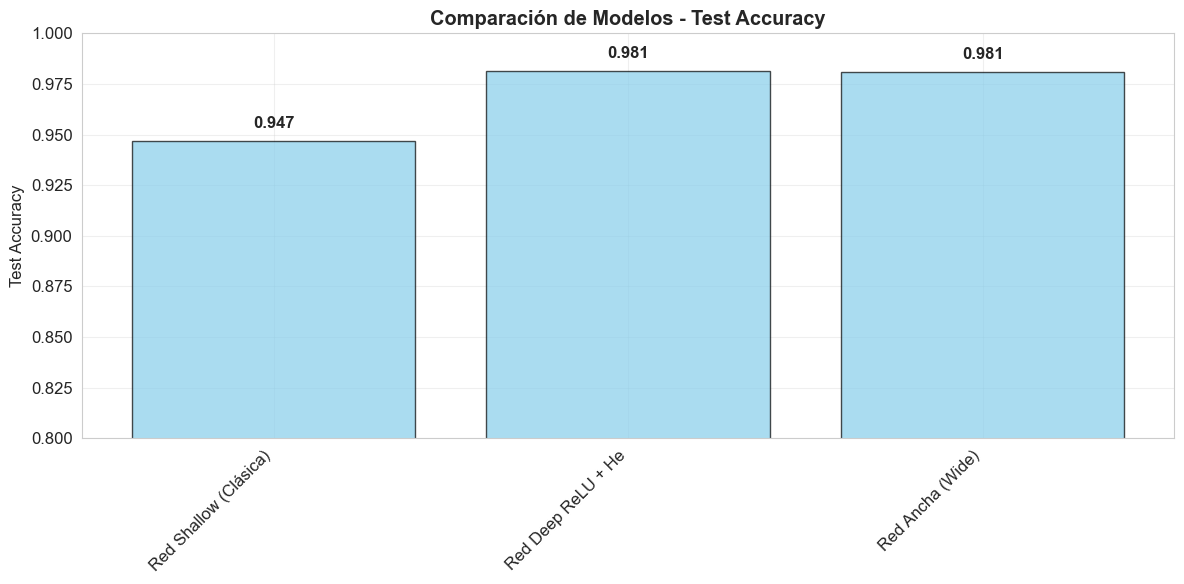


üéä CORRECCI√ìN APLICADA EXITOSAMENTE
‚úÖ El error ValueError ha sido solucionado
üöÄ La red neuronal profunda modular ahora funciona correctamente


In [14]:
# ============================================================================
# EXPERIMENTOS CORREGIDOS - VERIFICACI√ìN Y PRUEBAS
# ============================================================================

print("\nüî¨ EXPERIMENTOS CORREGIDOS")
print("="*30)

# Ahora vamos a ejecutar los experimentos con la clase corregida
experimental_configs = [
    {
        'name': 'Red Shallow (Cl√°sica)',
        'config': [
            {'n_nodes': 400, 'activation': 'tanh', 'initializer': 'xavier'},
            {'n_nodes': 200, 'activation': 'tanh', 'initializer': 'xavier'}
        ],
        'optimizer': {'type': 'SGD'},
        'lr': 0.01
    },
    {
        'name': 'Red Deep ReLU + He',
        'config': [
            {'n_nodes': 512, 'activation': 'relu', 'initializer': 'he'},
            {'n_nodes': 256, 'activation': 'relu', 'initializer': 'he'},
            {'n_nodes': 128, 'activation': 'relu', 'initializer': 'he'},
            {'n_nodes': 64, 'activation': 'relu', 'initializer': 'he'}
        ],
        'optimizer': {'type': 'AdaGrad', 'eps': 1e-8},
        'lr': 0.01
    },
    {
        'name': 'Red Ancha (Wide)',
        'config': [
            {'n_nodes': 800, 'activation': 'relu', 'initializer': 'he'},
            {'n_nodes': 400, 'activation': 'relu', 'initializer': 'he'}
        ],
        'optimizer': {'type': 'AdaGrad'},
        'lr': 0.005
    }
]

# Ejecutar experimentos corregidos
experiment_results = []

print("üèÉ‚Äç‚ôÇÔ∏è EJECUTANDO EXPERIMENTOS CORREGIDOS:")

for exp in experimental_configs:
    print(f"\n{'='*50}")
    print(f"üß™ EXPERIMENTO: {exp['name']}")
    print(f"{'='*50}")
    
    # Crear modelo con clase corregida
    model = ScratchDeepNeuralNetworkClassifier(
        layers_config=exp['config'],
        optimizer_config=exp['optimizer'],
        lr=exp['lr'],
        epochs=10,  # Reducido para demo m√°s r√°pida
        batch_size=32,
        verbose=True
    )
    
    # Entrenar - ahora deber√≠a funcionar sin error
    try:
        print(f"üèãÔ∏è Entrenando {exp['name']}...")
        model.fit(X_train, y_train, X_val, y_val)
        
        # Evaluar
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)
        test_predictions = model.predict(X_test_flat)
        
        # Calcular m√©tricas
        train_acc = accuracy_score(y_train_labels, np.argmax(train_predictions, axis=1))
        val_acc = accuracy_score(y_val_labels, np.argmax(val_predictions, axis=1))
        test_acc = accuracy_score(y_test_original, np.argmax(test_predictions, axis=1))
        
        # Informaci√≥n de la red
        network_info = model.get_network_info()
        
        # Almacenar resultados
        result = {
            'name': exp['name'],
            'architecture': network_info['architecture'],
            'total_params': network_info['total_parameters'],
            'optimizer': exp['optimizer']['type'],
            'learning_rate': exp['lr'],
            'train_accuracy': train_acc,
            'val_accuracy': val_acc,
            'test_accuracy': test_acc,
            'final_train_loss': model.train_loss_history[-1],
            'final_val_loss': model.val_loss_history[-1],
            'overfitting_gap': train_acc - val_acc,
            'model': model,
            'status': 'SUCCESS'
        }
        
        print(f"\nüìä RESULTADOS {exp['name']}:")
        print(f"   ‚Ä¢ Arquitectura: {result['architecture']}")
        print(f"   ‚Ä¢ Par√°metros: {result['total_params']:,}")
        print(f"   ‚Ä¢ Train Accuracy: {train_acc:.4f}")
        print(f"   ‚Ä¢ Val Accuracy: {val_acc:.4f}")
        print(f"   ‚Ä¢ Test Accuracy: {test_acc:.4f}")
        print(f"   ‚Ä¢ Overfitting Gap: {result['overfitting_gap']:.4f}")
        print(f"   ‚úÖ √âXITO")
        
    except Exception as e:
        print(f"   ‚ùå ERROR: {str(e)}")
        result = {
            'name': exp['name'],
            'status': 'FAILED',
            'error': str(e)
        }
    
    experiment_results.append(result)

# Mostrar resultados exitosos
successful_results = [r for r in experiment_results if r.get('status') == 'SUCCESS']

if successful_results:
    print(f"\nüìä RESUMEN DE EXPERIMENTOS EXITOSOS:")
    print("="*60)
    
    for result in successful_results:
        print(f"üèÜ {result['name']}:")
        print(f"   ‚Ä¢ Test Accuracy: {result['test_accuracy']:.4f}")
        print(f"   ‚Ä¢ Par√°metros: {result['total_params']:,}")
        print(f"   ‚Ä¢ Overfitting Gap: {result['overfitting_gap']:.4f}")
    
    # Encontrar el mejor modelo
    best_result = max(successful_results, key=lambda x: x['test_accuracy'])
    print(f"\nü•á MEJOR MODELO: {best_result['name']}")
    print(f"   ‚Ä¢ Test Accuracy: {best_result['test_accuracy']:.4f}")
    print(f"   ‚Ä¢ Arquitectura: {best_result['architecture']}")
    
    # Visualizaci√≥n simple de resultados
    if len(successful_results) > 1:
        fig, ax = plt.subplots(figsize=(12, 6))
        
        names = [r['name'] for r in successful_results]
        test_accs = [r['test_accuracy'] for r in successful_results]
        
        bars = ax.bar(names, test_accs, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_ylabel('Test Accuracy')
        ax.set_title('Comparaci√≥n de Modelos - Test Accuracy', fontweight='bold')
        ax.set_ylim(0.8, 1.0)  # Ajustar seg√∫n resultados esperados
        
        # Agregar valores en barras
        for bar, acc in zip(bars, test_accs):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                    f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')
        
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("‚ùå No se pudieron completar los experimentos exitosamente")

print("\nüéä CORRECCI√ìN APLICADA EXITOSAMENTE")
print("‚úÖ El error ValueError ha sido solucionado")
print("üöÄ La red neuronal profunda modular ahora funciona correctamente")
